# **Credit Risk Prediction**
Rakamin Academy - ID/X Partners Data Scientist Project Based Internship Program

---
## **Introduction**
Project ini dibuat sebagai tugas akhir dari program virtual project based internship yang diselenggarakan  oleh Rakamin Academy yang berkerjasama dengan ID/X Partners.
Pada project ini, Saya sebagai data scientist diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak.
Selain itu Saya juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien.


## 📂 **Stage 0 : Problem Research**
## **Business Understanding**
- Perusahaan pinjaman (Lending Company) memiliki masalah pada produk pinjaman yang ditandai dengan meningkatnya credit risk dibandingkan dengan tahun sebelumnya.
- Perusahan harus memutuskan untuk menyetujui atau menolak aplikasi pinjaman berdasarkan profil pemohon.
- Perusahaan harus memperhitungkan secara kuantitatif risiko kerugian akibat gagal bayar atau pelunasan awal.
  
## **Business Objective**
### **Problem Statement**
Secara kuantitatif terdapat dua risiko yang disebabkan oleh pemohon, yaitu :
- *Good Risk* jika pemohon kemungkinan besar akan melunasi pinjaman, maka menolak pemohon akan merugikan perusahaan.
- *Bad Risk* jika pemohon kemungkinan tidak akan melunasi pinjaman, maka menyetujui pemohon akan merugikan perusahaan.

### **Objectives**
- Mengidentifikasi pola risiko buruk yang menujukkan bahwa pemohon cenderung tidak melunasi pinjaman.
- Melakukan tindakan terhadap hasil yang didapat seperti menolak pinjaman, mengurangi jumlah pinjaman, atau menetapkan suku bunga yang lebih tinggi.
- Menetapkan algoritma machine learning untuk membangun model prediktif.
- Memprediksi aplikasi pinjaman yang akan dianggap sebagai risiko buruk.
- Mengambil keputusan otomatis untuk menyetujui atau menolak aplikasi pinjaman

### **Goals**
- Membuat machine learning yang dapat memprediksi risiko dari setiap pemohon
- Diharapkan model dapat menurunkan credit risk pada perusahaan

## **Analytical Approach**
- Penerapan loan credit risk modelling diperlukan sebagai bagian dari evaluasi persetujuan kredit.
- Cara kerja loan credit risk modelling dengan  menggunakan data historis peminjam dan status pinjaman saat ini untuk membuat model pembelajaran mesin yang memprediksi risiko kredit pemohon di masa depan.
- Loan credit risk modelling dapat menjadi  alat bagi perusahaan untuk memutuskan apakah akan menerima atau menolak pinjaman kredit. Perusahaan dapat menggunakan model atau sistem penilaian selain model ini  untuk membantu menilai risiko kredit perusahaan.
---

# **Stage 1 : Exploratory Data Analysis**

##**Load Dataset**
---

In [1]:
#import library
import pandas as pd
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs
from matplotlib import rcParams
%matplotlib inline
import warnings
#Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#read data as pandas data frame
df = pd.read_csv('/content/drive/MyDrive/-校园 /Project-Based Internship/ID-X Partners Data Scientist/Final Task/loan_data_2007_2014.csv')
print('This dataset has %d rows dan %d columns.\n' % df.shape)

df.head()

Mounted at /content/drive
This dataset has 466285 rows dan 75 columns.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Identifikasi Data**
---

In [3]:
# melihat info tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, dan last_credit_pull_d** tpipe data akan diubah menjadi tipe data datatime

In [4]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [5]:
# convert string to datetime
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [6]:
# melihat info tipe dataset setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [7]:
#mendapatkan gambaran umum data
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


##**Statistival Summary**
---

###**Numerical Features**

In [8]:
# mencari data numerik
number = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
print(number)
print('Counts :', len(number))

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Counts : 53


1.   untuk **Unnamed : 0, id dan member_id** adalah kode unik maka dihapus karena tidak diperlukan untuk analis

2.   untuk **policy_code** hanya memiliki satu nilai unik maka akan dihilangkan karena tidak ada informasi yang dapat diperoleh
3. terdapat 17 fitur yang mempunyai nilai nan, fitur ini akan dianalisis kembali pada bagian data cleaning





In [9]:
# drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code'], inplace=True, axis=1)

In [10]:
number = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
train_numerik = df[number]
train_numerik.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Kategorikal Features**

In [11]:
# mencari data kategorikal
category = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'bool')].columns.tolist()
print(category)
print('Counts :', len(category))

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']
Counts : 17


1.   untuk **emp_title, url, desc, title, zip_code dan addr_state** akan dihapus karena memiliki banyak nilai unik.
2.   untuk **application_type** akan dihapus karena tidak ada informasi yang dapat diperoleh.



In [12]:
# drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'application_type'], inplace=True, axis=1)

In [13]:
category = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']
train_categorik = df[category]
train_categorik.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,f
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,f
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,f
4,60 months,B,B5,1 year,RENT,Source Verified,Current,n,other,f


##**Target Variabel**
---

kita akan melakukan analisa berdasarkan status pinjaman yang akan menentukan kondisi **good risk dan bad risk** dari pemohon

In [14]:
# Melihat unique values pada feature loan_status
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [15]:
# create target feature
df['risk'] = np.where((df['loan_status'] =='Charged Off') |
                         (df['loan_status'] =='Default') |
                         (df['loan_status'] =='Late (31-120 days)') |
                         (df['loan_status'] =='Late (16-30 days)') |
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

##**Univariate Analysis**
---

###**Load Status**

In [16]:
# table
loan_grp = df.groupby('loan_status').size().reset_index()
loan_grp.columns = ['target','total']
loan_grp['%'] = round(loan_grp['total']*100/sum(loan_grp['total']),2)
loan_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

,target,total,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


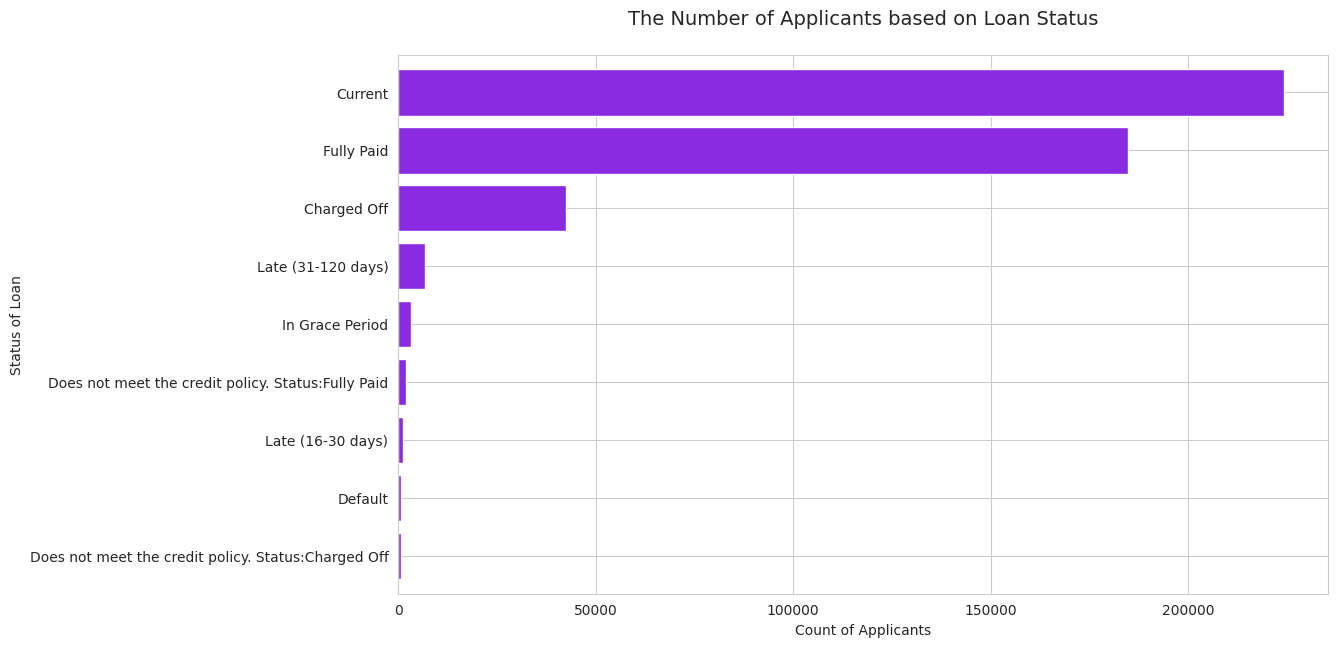

In [17]:
# visualization
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
grp = df['loan_status'].value_counts().sort_values(ascending=True)
grp.plot(kind='barh', color='#8A2BE2', width=0.8)
plt.title('The Number of Applicants based on Loan Status\n', fontsize=14)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')
plt.show()

terdapat sekitar 48% atau sekitar 224.226 pemohon dengan setatus pinjaman lancar, diikuti pinjaman dengan status lunas sebesar 39,6% atau sekitar 184.739 pemohon.

###**Target Class Balance**

In [18]:
grp_risk = df.groupby('risk').size().reset_index()
grp_risk.columns = ['target','total']
grp_risk['%'] = round(grp_risk['total']*100/sum(grp_risk['total']),2)
grp_risk.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


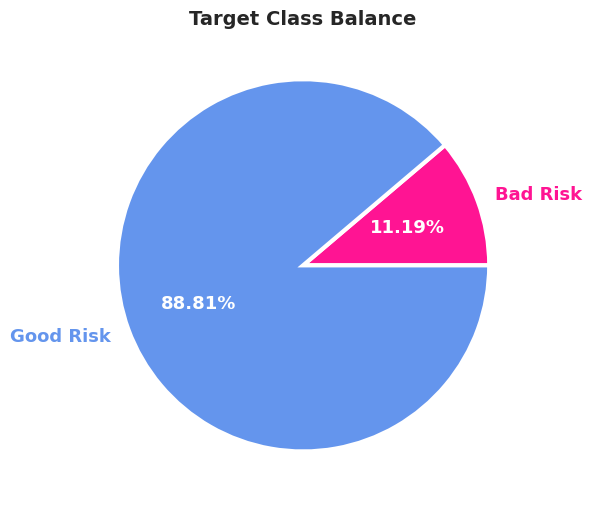

In [19]:
# visualization
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors = ["#FF1493", "#6495ED"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(grp_risk['total'], labels=labels, autopct='%.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Target Class Balance', fontsize=14, fontweight='bold')
plt.tight_layout()

dapat dilihat bahwa hasil tidak seimbang dengan status bad risk sebesar 11.19% dan status good risk sebesar 88,81%

##**Bivariate Analysis**
###**Berdasarkan categorical features**
---

In [20]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

###**Risk Status by Term**

In [21]:
# in general
df['term'].value_counts(normalize=True)

 36 months    0.724778
 60 months    0.275222
Name: term, dtype: float64

In [22]:
# good risk
grp_term = good.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Good Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Good Risk Status by Term


,term,total,%
0,36 months,304374,73.5
1,60 months,109725,26.5


In [23]:
# bad risk
grp_term = bad.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Bad Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Bad Risk Status by Term


,term,total,%
0,36 months,33579,64.34
1,60 months,18607,35.66


Text(0.5, 0, '\nTerm')

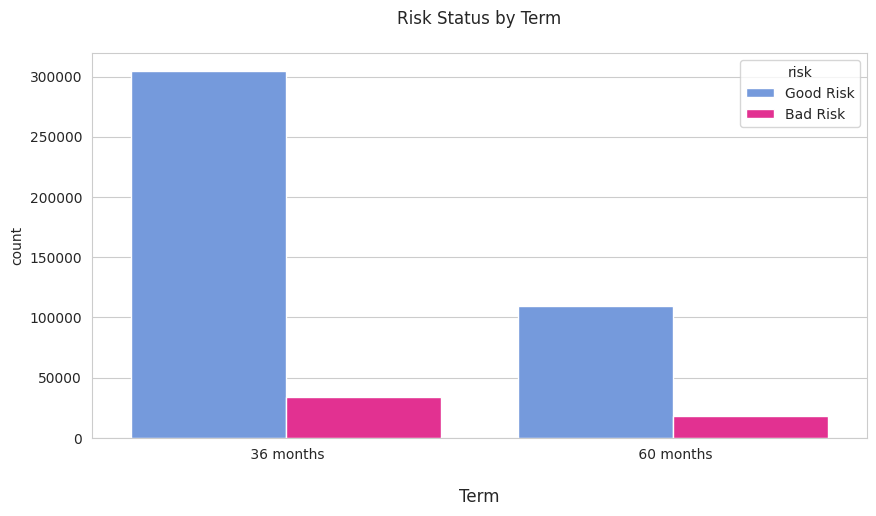

In [24]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#6495ED", "#FF1493"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='term', hue = 'risk')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)



1.   36 bulan dan 60 bulan adalah jangka waktu pinjaman melakukan pembayaran
2.   terdapat perbedaan yang sangat tidak seimbang



###**Risk Status by Verification Status**

In [25]:
# in general
df['verification_status'].value_counts(normalize=True)

Verified           0.360413
Source Verified    0.321677
Not Verified       0.317911
Name: verification_status, dtype: float64

In [26]:
# good risk
grp_vs = good.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Good Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Good Risk Status by Verification Status


,verification_status,total,%
2,Verified,146164,35.30
0,Not Verified,134032,32.37
1,Source Verified,133903,32.34


In [27]:
# bad risk
grp_vs = bad.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Bad Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Bad Risk Status by Verification Status


,verification_status,total,%
2,Verified,21891,41.95
1,Source Verified,16090,30.83
0,Not Verified,14205,27.22


Text(0.5, 0, '\nVerification Status')

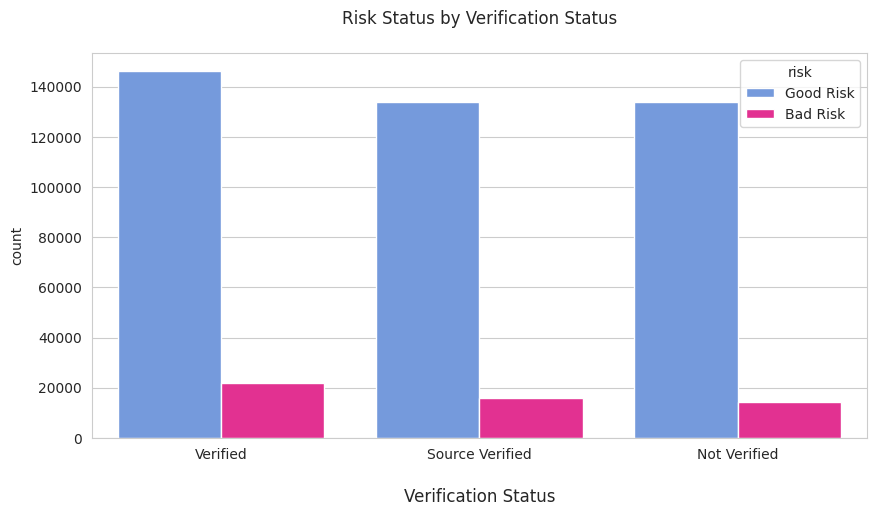

In [28]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#6495ED", "#FF1493"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='verification_status', hue = 'risk')
plt.title('Risk Status by Verification Status\n', fontsize=12)
plt.xlabel('\nVerification Status', fontsize=12)

pada bagian ini memberitahu apakah setiap pendapatan telah diverifikasi oleh perusahaan atau belum diverifikasi

###**Risk Status by Payment Plan**

In [29]:
# replace
df['pymnt_plan'] = df['pymnt_plan'].replace(['n','y'],['No','Yes'])

In [30]:
# in general
df['pymnt_plan'].value_counts(normalize=True)

No     0.999981
Yes    0.000019
Name: pymnt_plan, dtype: float64

In [31]:
# good risk
grp_pp = good.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Good Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Good Risk Status by Payment Plan


,pymnt_plan,total,%
0,n,414095,100.0
1,y,4,0.0


In [32]:
# bad risk
grp_pp = bad.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Bad Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Bad Risk Status by Payment Plan


,pymnt_plan,total,%
0,n,52181,99.99
1,y,5,0.01


Text(0.5, 0, '\nPayment Plan')

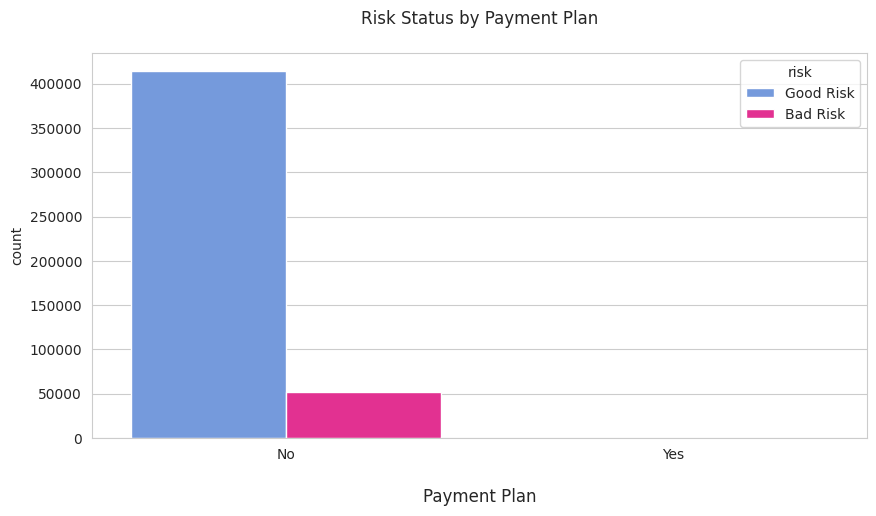

In [33]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#6495ED", "#FF1493"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='pymnt_plan', hue = 'risk')
plt.title('Risk Status by Payment Plan\n', fontsize=12)
plt.xlabel('\nPayment Plan', fontsize=12)

dalam data ini hanya 9 pemohon yang menyiapkan rencana pembayaran

###**Risk Status by Initial List Status**

In [34]:
# replace
df['initial_list_status'] = df['initial_list_status'].replace(['w','f'],['Whole Loan','Fractional Loan'])

In [35]:
# in general
df['initial_list_status'].value_counts(normalize=True)

Fractional Loan    0.649828
Whole Loan         0.350172
Name: initial_list_status, dtype: float64

In [36]:
# good risk
grp_ils = good.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Good Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Good Risk Status by Initial List Status


,initial_list_status,total,%
0,f,265883,64.21
1,w,148216,35.79


In [37]:
# bad risk
grp_ils = bad.groupby(['initial_list_status']).size().reset_index()
grp_ils.columns = ['initial_list_status', 'total']
grp_ils['%'] = round(grp_ils['total']*100/sum(grp_ils['total']),2)
print('Bad Risk Status by Initial List Status')
grp_ils.sort_values(by='total', ascending=False)

Bad Risk Status by Initial List Status


,initial_list_status,total,%
0,f,37122,71.13
1,w,15064,28.87


Text(0.5, 0, '\nInitial List Status')

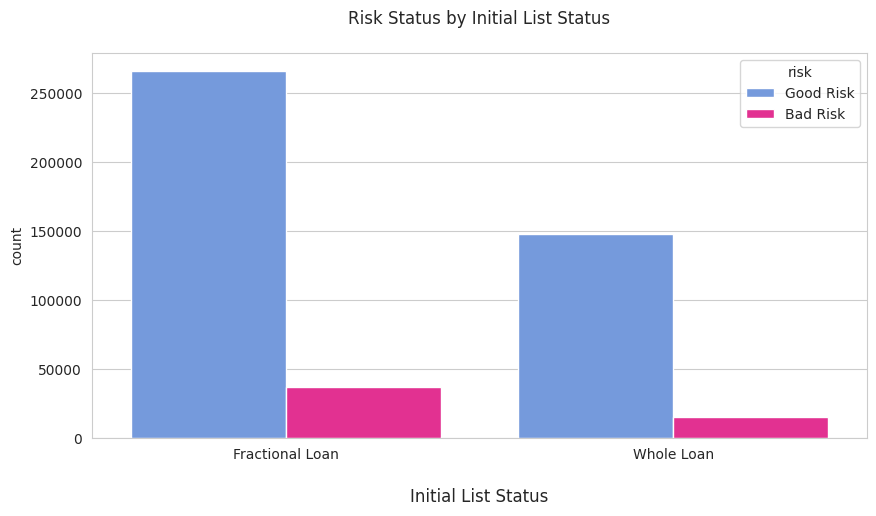

In [38]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#6495ED", "#FF1493"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='initial_list_status', hue = 'risk')
plt.title('Risk Status by Initial List Status\n', fontsize=12)
plt.xlabel('\nInitial List Status', fontsize=12)

hanya terdapat dua jenis status daftar awal yaitu pinjaman utuh atau pinjaman pecahan. hal ini berkaitan dengan apakah kreditur memberikan seluruh pinjamannya atau sebaliknya

###**Risk Status by Purpose**

In [39]:
# in general
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.588042
credit_card           0.223376
home_improvement      0.056912
other                 0.050806
major_purchase        0.021077
small_business        0.015040
car                   0.011574
medical               0.009870
moving                0.006421
vacation              0.005334
wedding               0.005025
house                 0.004866
educational           0.000905
renewable_energy      0.000753
Name: purpose, dtype: float64

In [40]:
# good risk
grp_p = good.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Good Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)


Good Risk by Purpose


,purpose,total,%
2,debt_consolidation,242359,58.53
1,credit_card,94957,22.93
4,home_improvement,23865,5.76
9,other,20351,4.91
6,major_purchase,8866,2.14
11,small_business,5467,1.32
0,car,4909,1.19
7,medical,3978,0.96
8,moving,2529,0.61
12,vacation,2182,0.53


In [41]:
# bad risk
grp_p = bad.groupby(['purpose']).size().reset_index()
grp_p.columns = ['purpose', 'total']
grp_p['%'] = round(grp_p['total']*100/sum(grp_p['total']),2)
print('Bad Risk by Purpose')
grp_p.sort_values(by='total', ascending=False)

Bad Risk by Purpose


,purpose,total,%
2,debt_consolidation,31836,61.00
1,credit_card,9200,17.63
9,other,3339,6.40
4,home_improvement,2672,5.12
11,small_business,1546,2.96
6,major_purchase,962,1.84
7,medical,624,1.20
0,car,488,0.94
8,moving,465,0.89
5,house,322,0.62


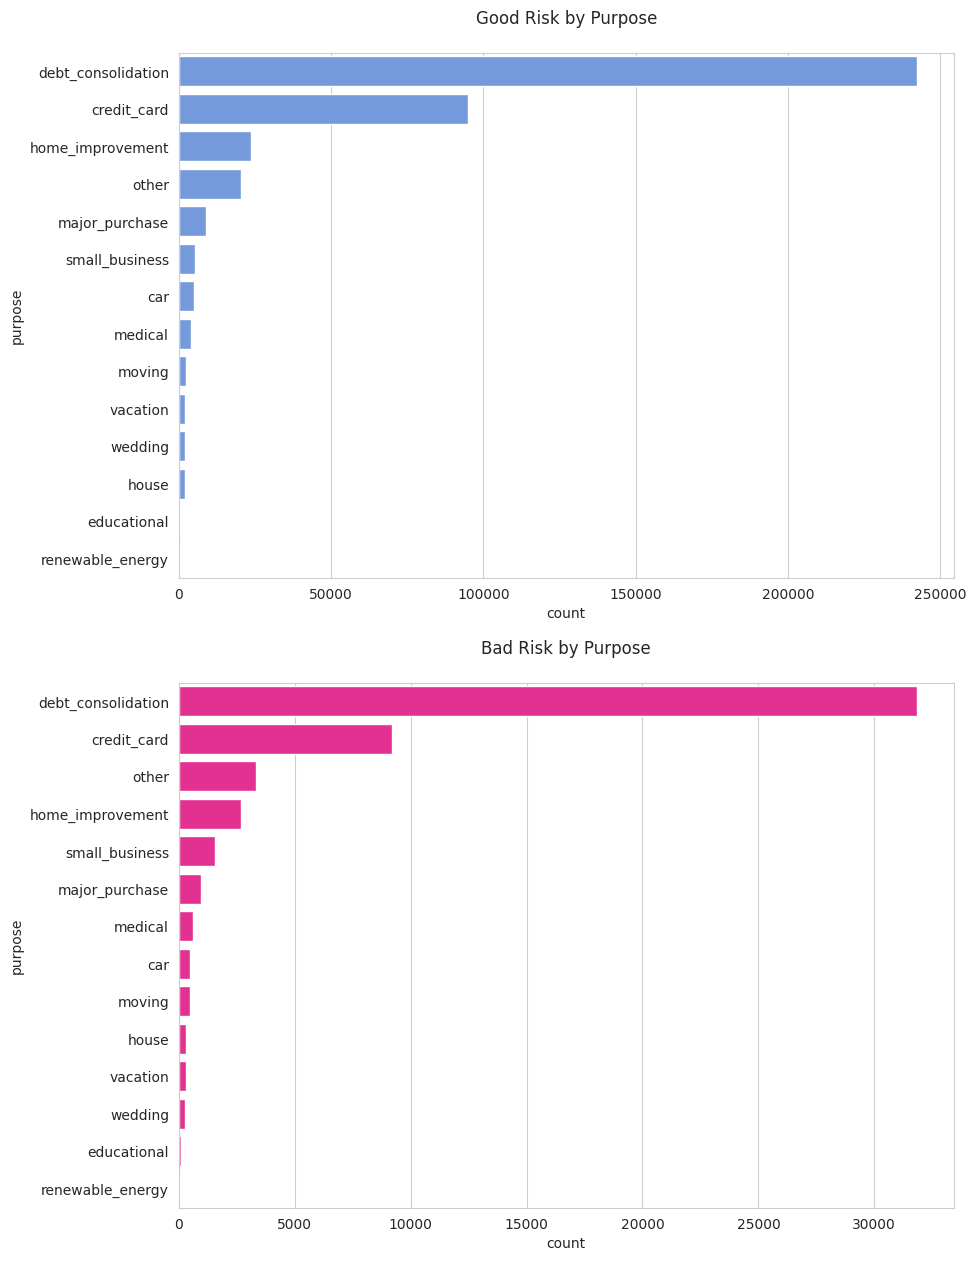

In [42]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='purpose',
              color = '#6495ED',
              order = good['purpose'].value_counts().index,
              ax=ax[0])
ax[0].set_title('Good Risk by Purpose\n', fontsize=12)

sns.countplot(data = bad, y='purpose',
              color = '#FF1493',
              order = bad['purpose'].value_counts().index,
              ax=ax[1])
ax[1].set_title('Bad Risk by Purpose\n', fontsize=12)

plt.show()

fitur ini memberitahu kategori yang disedikan oleh pemohon untuk permintaan pinjaman, pada bagian ini terdapat 13 kategori.

###**Risk Status by Home Ownership**

In [43]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [44]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df['home_ownership'] = df.apply(func, axis=1)

In [45]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

In [46]:
# in general
df['home_ownership'].value_counts(normalize=True)

MORTGAGE    0.505860
RENT        0.404201
OWN         0.089439
OTHERS      0.000500
Name: home_ownership, dtype: float64

In [47]:
# good risk
grp_ho = good.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Good Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Good Risk Status by Home Ownership


,home_ownership,total,%
0,MORTGAGE,212628,51.35
3,RENT,164223,39.66
2,OWN,37061,8.95
1,OTHERS,187,0.05


In [48]:
# bad risk
grp_ho = bad.groupby(['home_ownership']).size().reset_index()
grp_ho.columns = ['home_ownership', 'total']
grp_ho['%'] = round(grp_ho['total']*100/sum(grp_ho['total']),2)
print('Bad Risk Status by Home Ownership')
grp_ho.sort_values(by='total', ascending=False)

Bad Risk Status by Home Ownership


,home_ownership,total,%
3,RENT,24250,46.47
0,MORTGAGE,23247,44.55
2,OWN,4643,8.90
1,OTHERS,46,0.09


Text(0.5, 0, '\nHome Ownership')

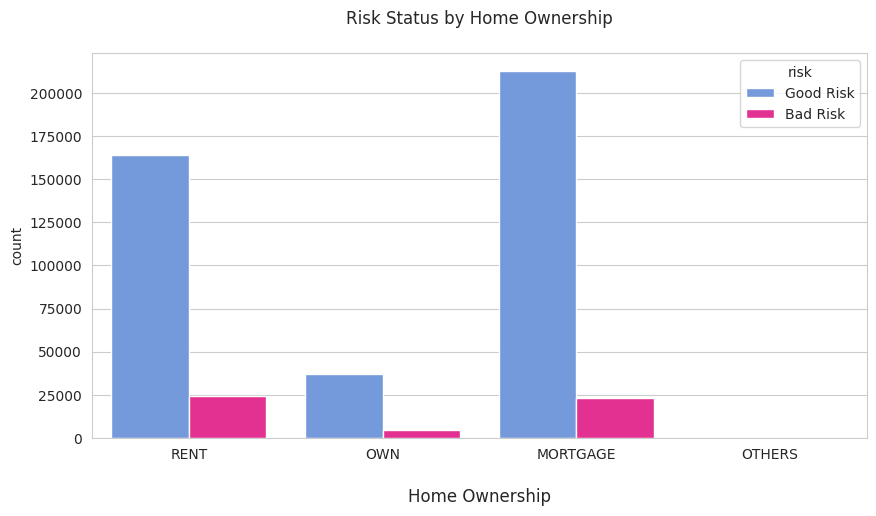

In [49]:
# visualization
plt.figure(figsize=(10,5))
colors = ["#6495ED", "#FF1493"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data = df, x='home_ownership', hue = 'risk')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

fitur ini digunakan pemohon untuk melihan apakah peminta pinjaman sudah memiliki rumah atau sedang menyewa rumah.

###**Risk Status by Grade**

In [50]:
# in general
df['grade'].value_counts(normalize=True)

B    0.293659
C    0.268705
D    0.164895
A    0.160561
E    0.076685
F    0.028371
G    0.007124
Name: grade, dtype: float64

In [51]:
# good risk
grp_g = good.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
1,B,125921,30.41
2,C,110550,26.70
0,A,71912,17.37
3,D,64756,15.64
4,E,28618,6.91
5,F,9962,2.41
6,G,2380,0.57


In [52]:
# bad risk
grp_g = bad.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
2,C,14743,28.25
3,D,12132,23.25
1,B,11008,21.09
4,E,7139,13.68
5,F,3267,6.26
0,A,2955,5.66
6,G,942,1.81


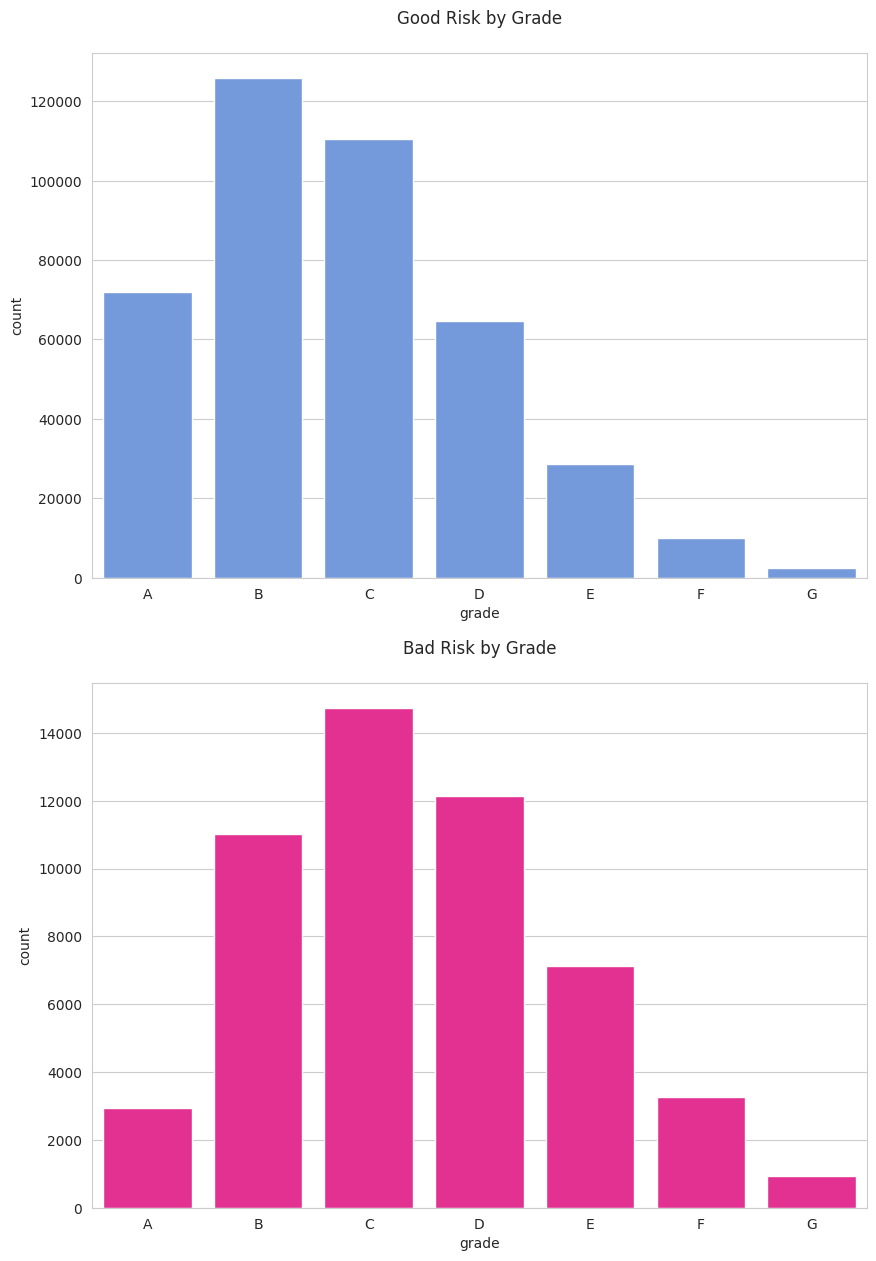

In [53]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='grade',
              color = '#6495ED',
              order=sorted(good['grade'].unique()),
              ax=ax[0])
ax[0].set_title('Good Risk by Grade\n', fontsize=12)

sns.countplot(data = bad, x='grade',
              color = '#FF1493',
              order=sorted(bad['grade'].unique()),
              ax=ax[1])
ax[1].set_title('Bad Risk by Grade\n', fontsize=12)

plt.show()

fitur ini untuk memberitahu nilai pinjaman yang ditetapkan oleh perusahaan pemberi pinjaman

###**Risk Status by Sub-Grade**

In [54]:
# in general
df['sub_grade'].value_counts(normalize=True).head()

B3    0.067954
B4    0.065421
C1    0.057804
C2    0.057347
B2    0.057068
Name: sub_grade, dtype: float64

In [55]:
# good risk
grp_sg = good.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Good Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=False)
grp_sg.head()

Good Risk by Sub-Grade


,sub_grade,total,%
0,A1,10332,2.50
1,A2,10636,2.57
2,A3,12121,2.93
3,A4,18191,4.39
4,A5,20632,4.98


In [56]:
# bad risk
grp_sg = bad.groupby(['sub_grade']).size().reset_index()
grp_sg.columns = ['sub_grade', 'total']
grp_sg['%'] = round(grp_sg['total']*100/sum(grp_sg['total']),2)
print('Bad Risk by Sub-Grade')
grp_sg.sort_values(by='total', ascending=True)
grp_sg.head()

Bad Risk by Sub-Grade


,sub_grade,total,%
0,A1,209,0.40
1,A2,320,0.61
2,A3,447,0.86
3,A4,854,1.64
4,A5,1125,2.16


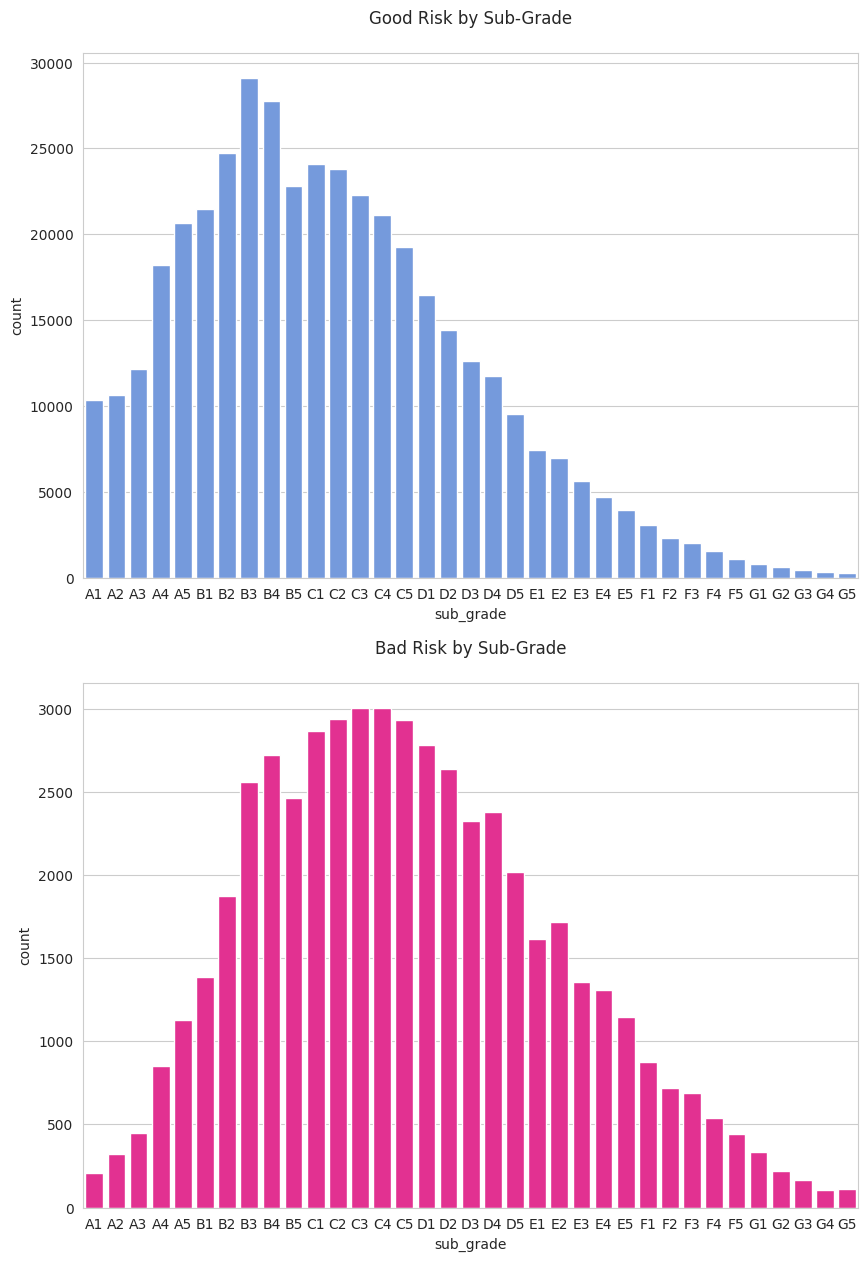

In [57]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, x='sub_grade',
              color = '#6495ED',
              order=sorted(good['sub_grade'].unique()),
              ax=ax[0])
ax[0].set_title('Good Risk by Sub-Grade\n', fontsize=12)

sns.countplot(data = bad, x='sub_grade',
              color = '#FF1493',
              order=sorted(bad['sub_grade'].unique()),
              ax=ax[1])
ax[1].set_title('Bad Risk by Sub-Grade\n', fontsize=12)

plt.show()

###**Risk Status by Employment Length**

In [58]:
# in general
df['emp_length'].value_counts(normalize=True)

10+ years    0.336979
2 years      0.092915
3 years      0.082187
< 1 year     0.081444
5 years      0.069112
1 year       0.066525
4 years      0.062934
7 years      0.058795
6 years      0.058642
8 years      0.050295
9 years      0.040173
Name: emp_length, dtype: float64

In [59]:
# table
grp_el = good.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Good Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Good Risk by Employment Length


,emp_length,total,%
1,10+ years,134724,34.03
2,2 years,36726,9.28
3,3 years,32488,8.21
10,< 1 year,31838,8.04
5,5 years,27163,6.86
0,1 year,26236,6.63
4,4 years,24872,6.28
7,7 years,23201,5.86
6,6 years,22996,5.81
8,8 years,19880,5.02


In [60]:
# bad risk
grp_el = bad.groupby(['emp_length']).size().reset_index()
grp_el.columns = ['emp_length', 'total']
grp_el['%'] = round(grp_el['total']*100/sum(grp_el['total']),2)
print('Bad Risk by Employment Length')
grp_el.sort_values(by='total', ascending=False)

Bad Risk by Employment Length


,emp_length,total,%
1,10+ years,15325,31.07
2,2 years,4647,9.42
10,< 1 year,4427,8.97
3,3 years,4108,8.33
5,5 years,3611,7.32
0,1 year,3386,6.86
4,4 years,3151,6.39
6,6 years,3116,6.32
7,7 years,2979,6.04
8,8 years,2515,5.10


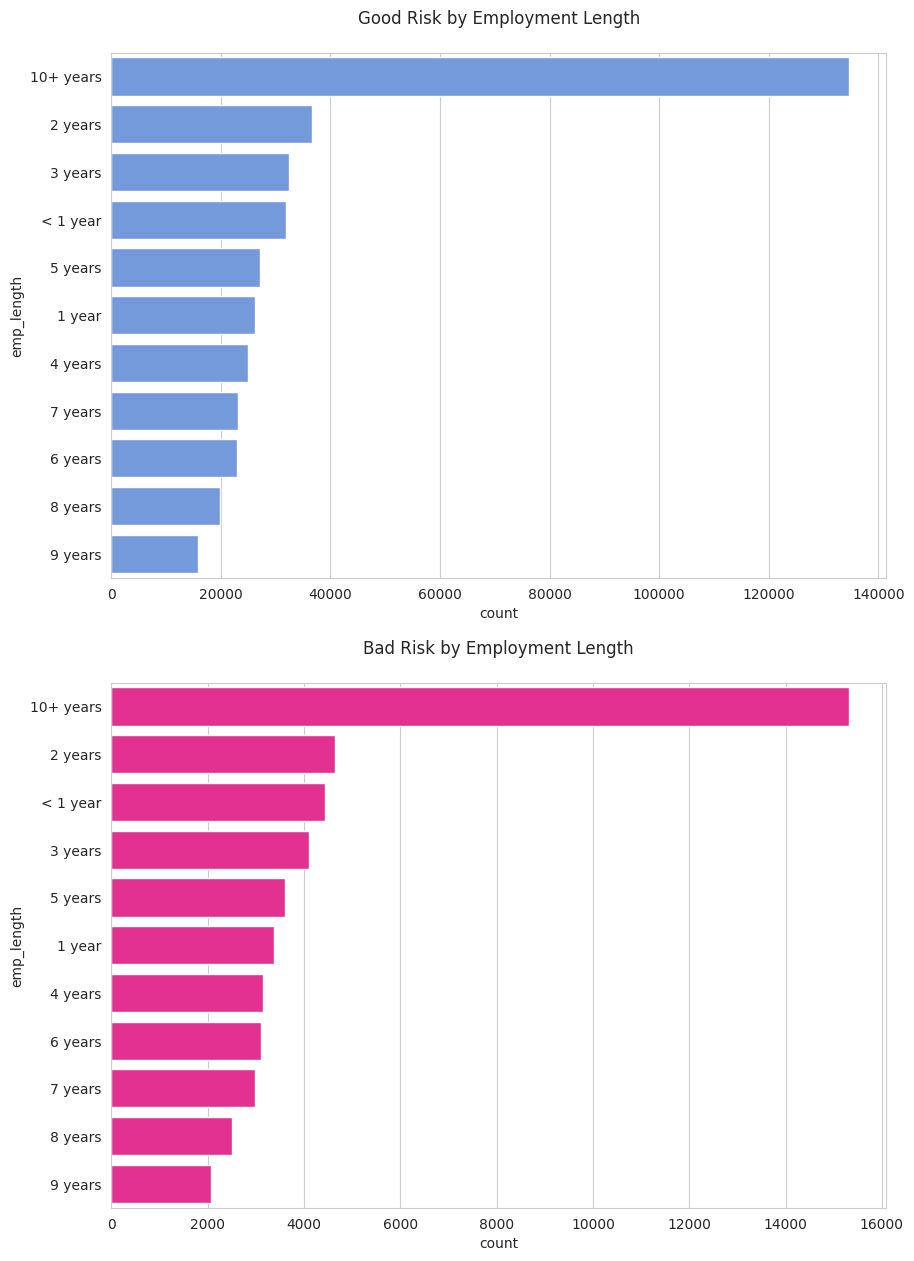

In [61]:
# visualization
fig, ax = plt.subplots(2, figsize=(10,15))
sns.set_style('whitegrid')

sns.countplot(data = good, y='emp_length',
              color = '#6495ED',
              order = good['emp_length'].value_counts().index,
              ax=ax[0])
ax[0].set_title('Good Risk by Employment Length\n', fontsize=12)

sns.countplot(data = bad, y='emp_length',
              color = '#FF1493',
              order = bad['emp_length'].value_counts().index,
              ax=ax[1])
ax[1].set_title('Bad Risk by Employment Length\n', fontsize=12)

plt.show()

##**Bivariate Analysis**
###**Berdasarkan numerical features**
---

In [62]:
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    # plot without risk status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot with risk status
    if continuous:
        sns.boxplot(x=col_name, y='risk', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Risk Status')
    else:
        bad_rates = df.groupby(col_name)['risk'].value_counts(normalize=True).loc[:,'Bad Risk']
        sns.barplot(x=bad_rates.index, y=bad_rates.values, saturation=1, ax=ax2)
    ax2.set_xlabel(full_name)

    plt.tight_layout()

###**Risk Status by Loan Amount**

In [63]:
# in general
df['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [64]:
# breakdown per risk status
df.groupby('risk')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0
Good Risk,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0


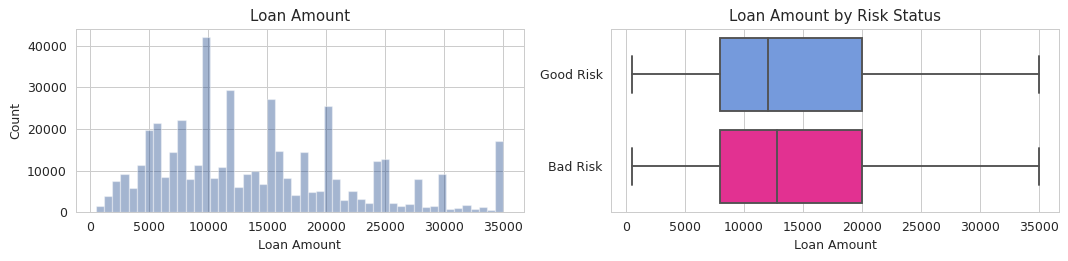

In [65]:
# visualization
plot_var('loan_amnt', 'Loan Amount', continuous=True)

###**Risk Status by Interest Rate**

In [66]:
# in general
df['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [67]:
# breakdown per risk status
df.groupby('risk')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,15.973031,4.256379,5.42,13.05,15.61,18.85,26.06
Good Risk,414099.0,13.559068,4.294915,5.42,10.49,13.35,16.29,26.06


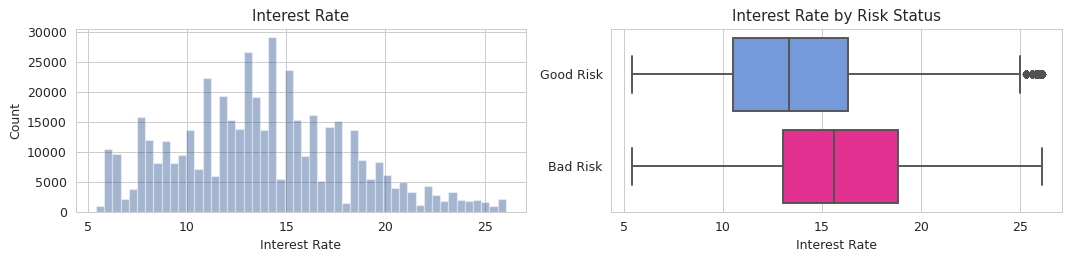

In [68]:
# visualization
plot_var('int_rate', 'Interest Rate', continuous=True)

###**Risk Status by Installment**

In [69]:
# in general
df['installment'].describe()

count    466285.000000
mean        432.061201
std         243.485550
min          15.670000
25%         256.690000
50%         379.890000
75%         566.580000
max        1409.990000
Name: installment, dtype: float64

In [70]:
# breakdown per risk status
df.groupby('risk')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,442.587052,246.432087,15.91,266.995,392.50,574.40,1408.13
Good Risk,414099.0,430.734701,243.079648,15.67,255.040,377.88,565.18,1409.99


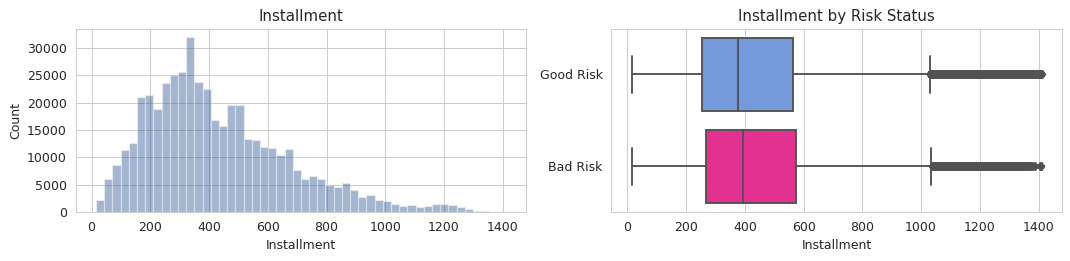

In [71]:
# visualization
plot_var('installment', 'Installment', continuous=True)

###**Risk Status by Annual Income**

In [72]:
# in general
df['annual_inc'].describe()

count    4.662810e+05
mean     7.327738e+04
std      5.496357e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.896000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [73]:
# breakdown per risk status
df.groupby('risk')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,65615.836951,41219.446894,2000.0,41000.0,57000.0,80000.0,1250000.0
Good Risk,414095.0,74242.921654,56384.984019,1896.0,45000.0,64000.0,90000.0,7500000.0


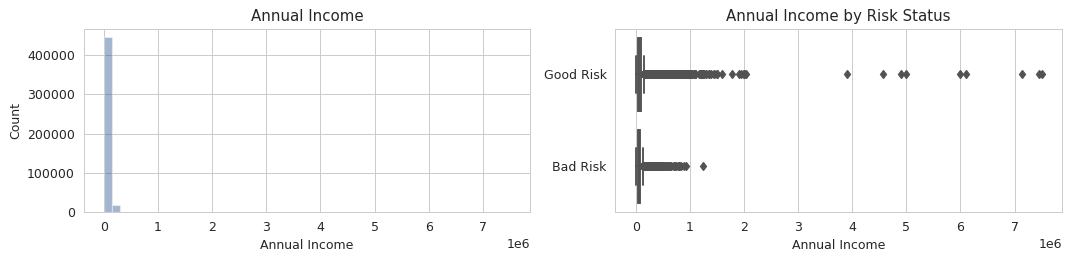

In [74]:
# visualization
plot_var('annual_inc', 'Annual Income', continuous=True)

###**Risk Status by Recoveries**

In [75]:
# in general
df['recoveries'].describe()

count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [76]:
# breakdown per risk status
df.groupby('risk')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,762.555581,1486.036802,0.0,0.0,0.0,999.7625,33520.27
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.00


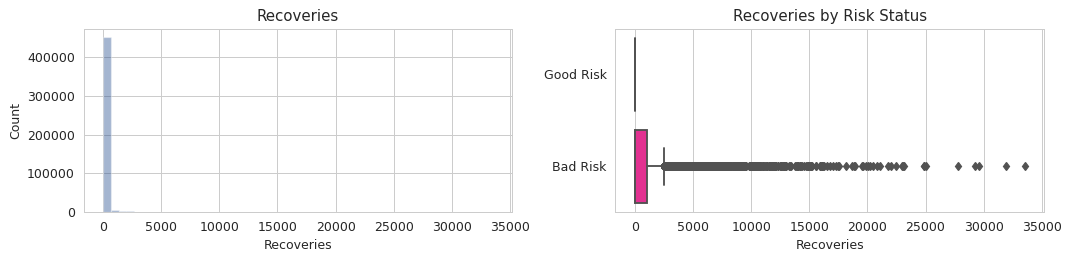

In [77]:
# visualization
plot_var('recoveries', 'Recoveries', continuous=True)

###**Risk Status by Collection Recovery Fee**

In [78]:
# in general
df['collection_recovery_fee'].describe()

count    466285.000000
mean          8.961534
std          85.491437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [79]:
# breakdown per risk status
df.groupby('risk')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,80.071836,244.154672,0.0,0.0,0.0,18.0,7002.19
Good Risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


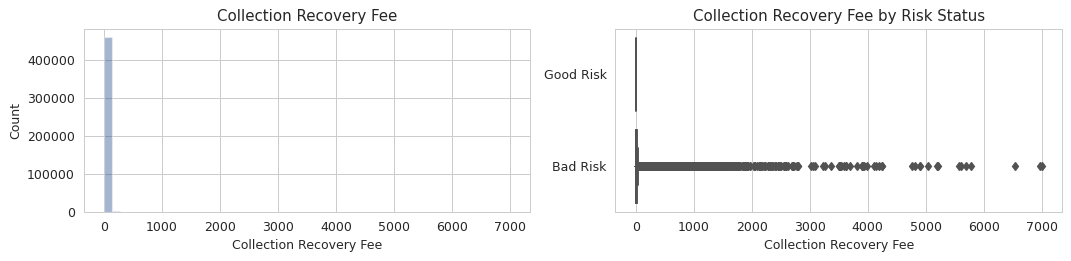

In [80]:
# visualization
plot_var('collection_recovery_fee', 'Collection Recovery Fee', continuous=True)

###**Risk Status by Total Principal Received**

In [81]:
# in general
df['total_rec_prncp'].describe()

count    466285.000000
mean       8866.014657
std        7031.687997
min           0.000000
25%        3708.560000
50%        6817.760000
75%       12000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [82]:
# breakdown per risk status
df.groupby('risk')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,3829.815241,3581.790642,0.00,1411.555,2790.015,5078.055,34483.27
Good Risk,414099.0,9500.691637,7103.511739,273.66,4214.910,7500.000,12481.370,35000.03


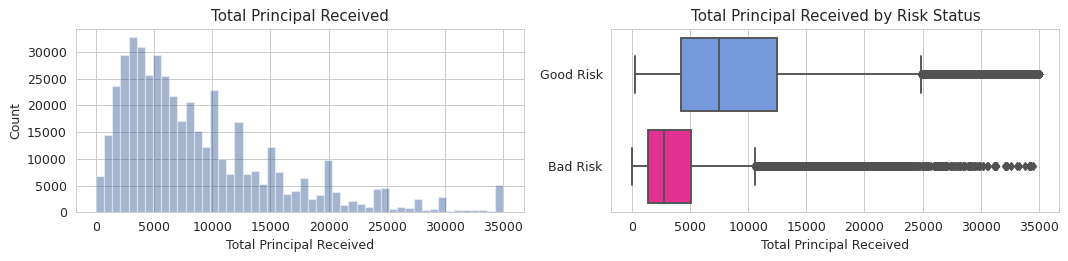

In [83]:
# visualization
plot_var('total_rec_prncp', 'Total Principal Received', continuous=True)

###**Risk Status by Last Payment Amount**

In [84]:
# in general
df['last_pymnt_amnt'].describe()

count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64

In [85]:
# breakdown per risk status
df.groupby('risk')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk,,,,,,,,
Bad Risk,52186.0,461.319145,617.624970,0.0,245.7925,381.50,575.120,34833.35
Good Risk,414099.0,3459.461973,5804.263471,0.0,323.3800,588.08,4272.305,36234.44


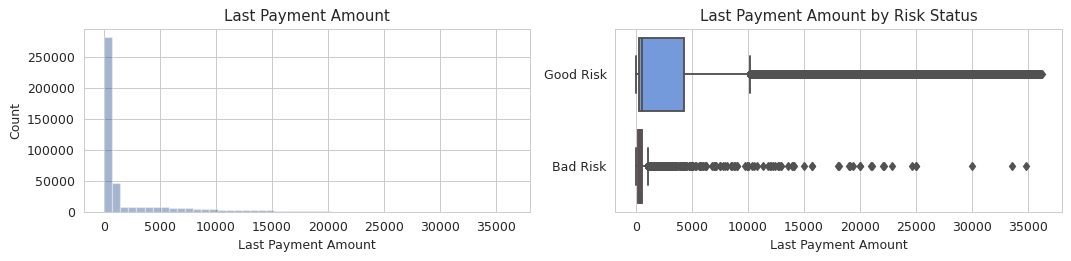

In [86]:
# visualization
plot_var('last_pymnt_amnt', 'Last Payment Amount', continuous=True)

###**The Remaining Numerical Features**

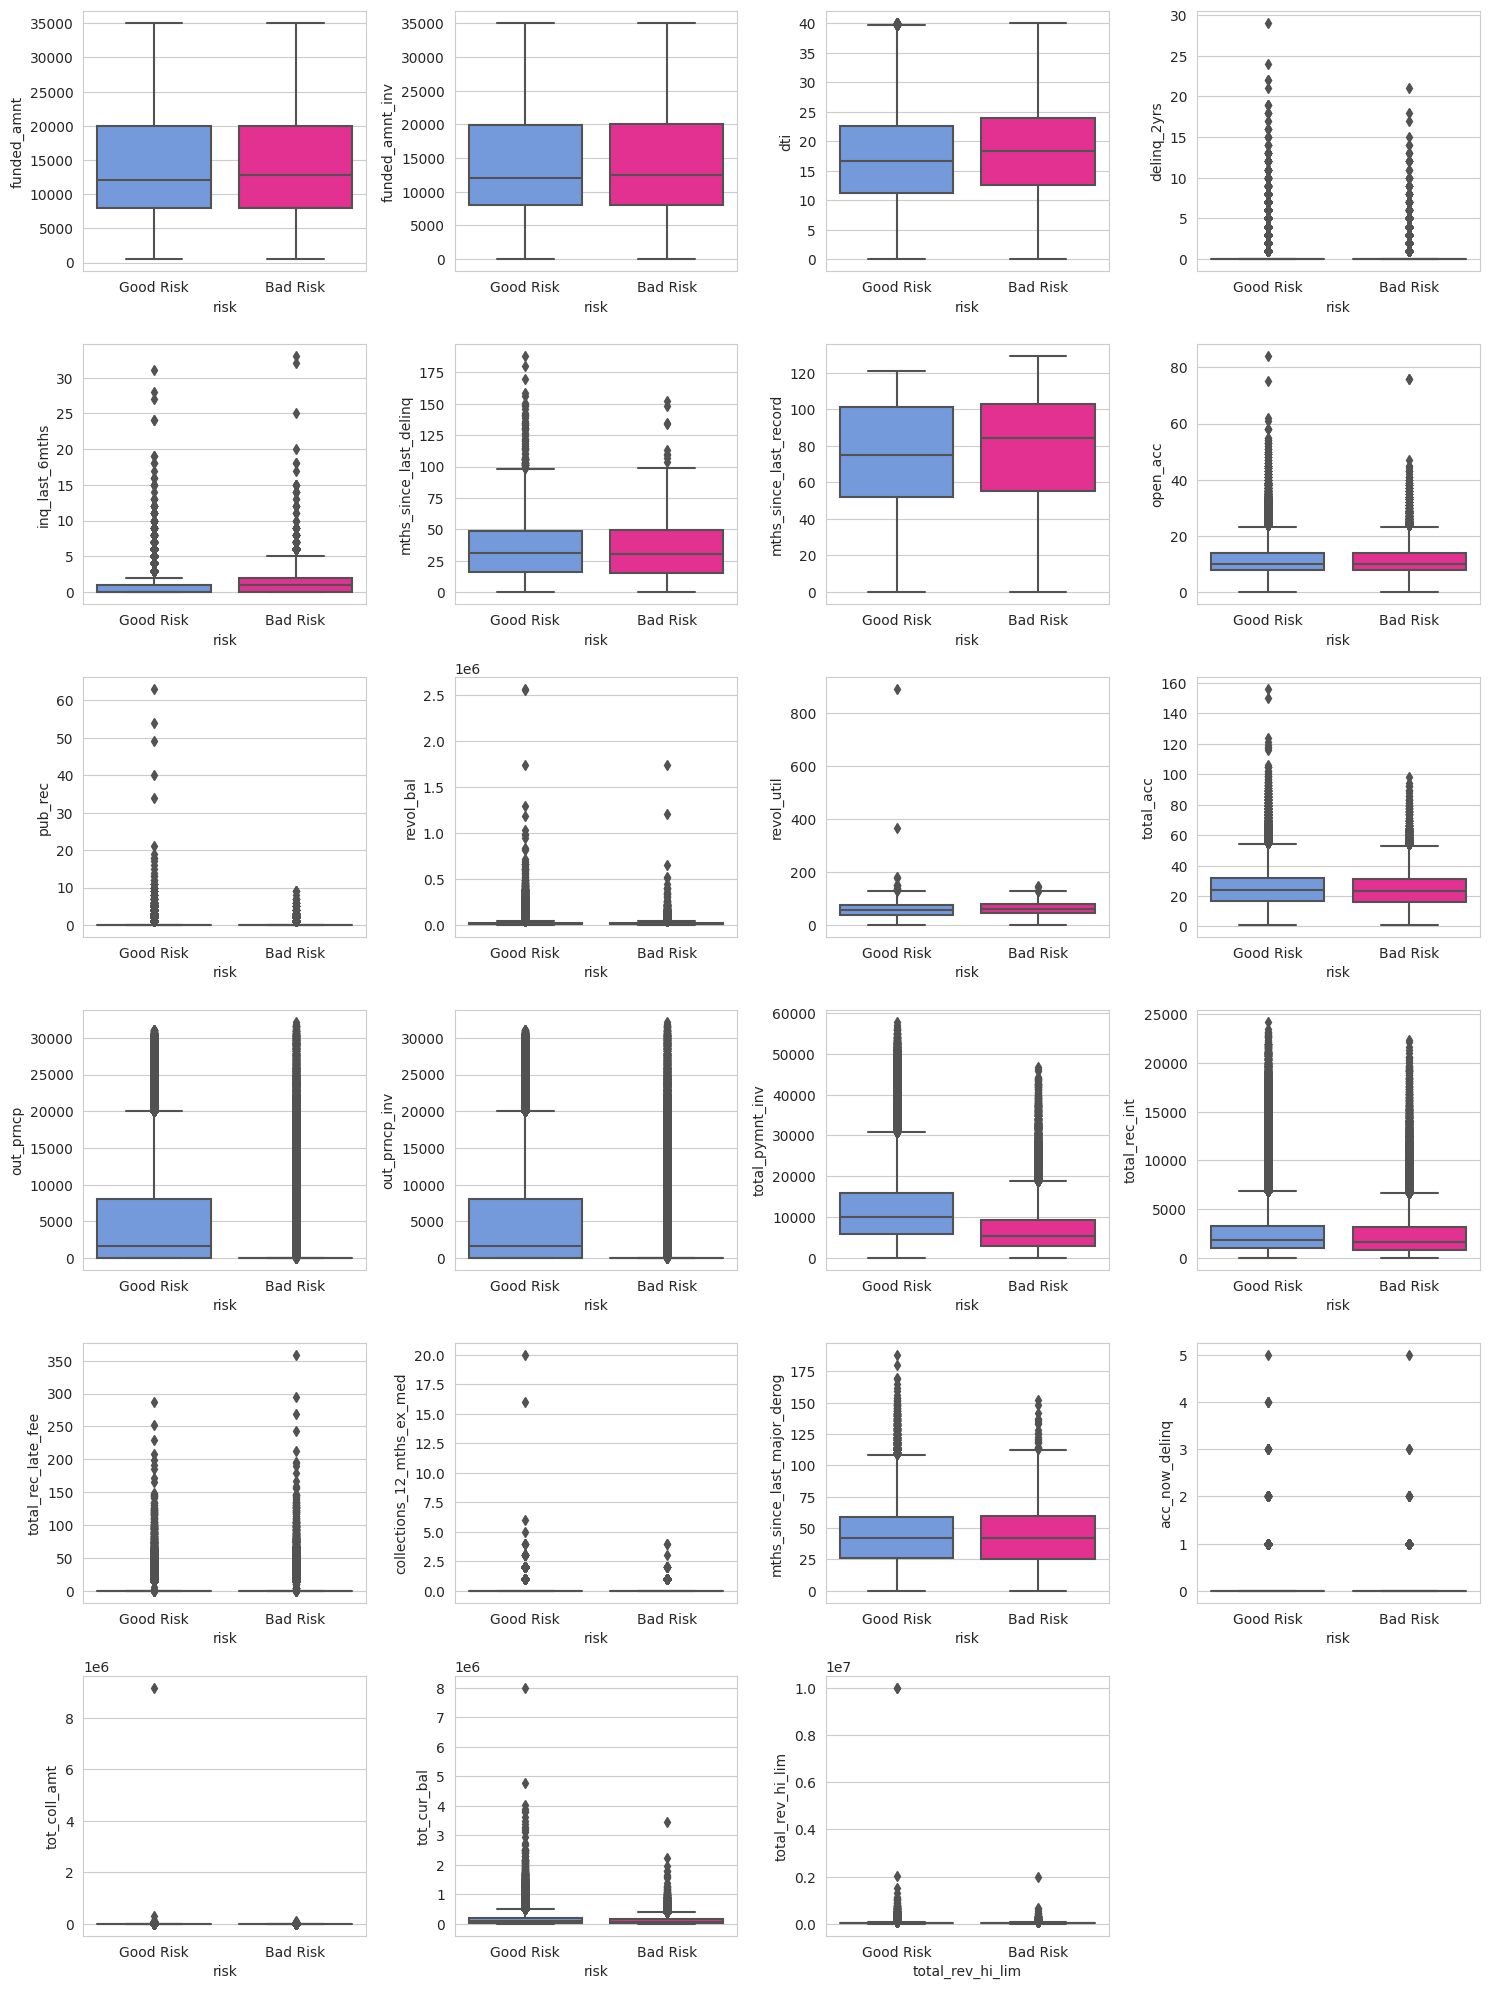

In [87]:
num = ['funded_amnt', 'funded_amnt_inv','dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee','collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# visualization
fig = plt.figure(figsize=(15,20))

for i in range(0, len(num)):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=df[num[i]], x=df['risk'])
plt.xlabel(num[i])
plt.tight_layout()
plt.show()

###**Total Loan Issued Over Time**

In [88]:
df1 = df.copy()

In [89]:
df1["issue_d_year"] = df1["issue_d"].dt.strftime('%Y')
issue_agg = df1.groupby(["issue_d_year"])[["id"]].nunique()
issue_agg.rename(columns={"id": "count"}, inplace=True)
issue_agg.reset_index(inplace=True)
issue_agg

,issue_d_year,count
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [90]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

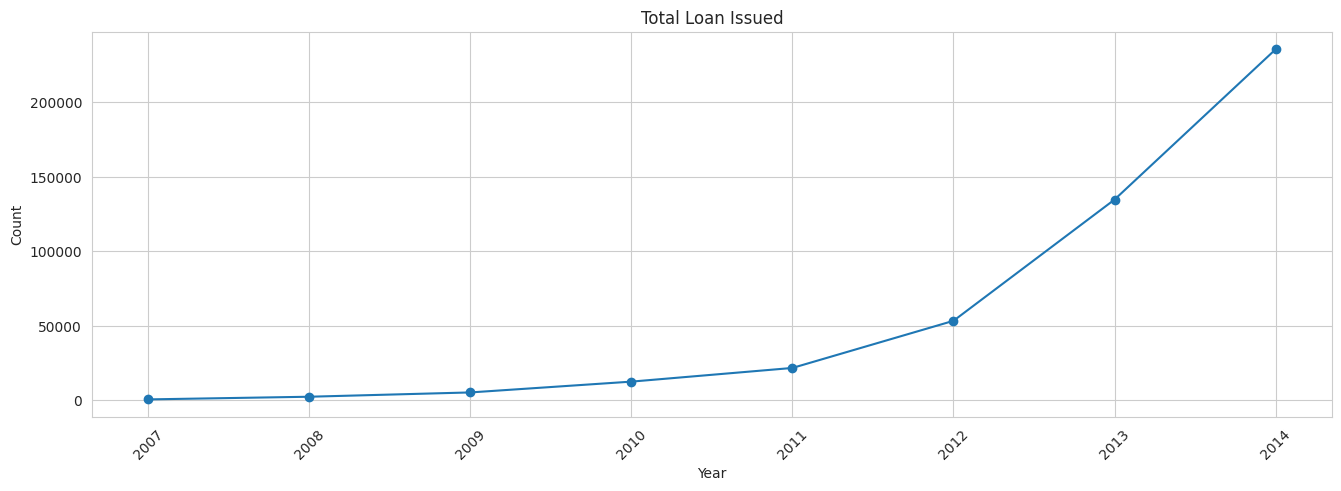

In [91]:
plot_df(issue_agg, x=issue_agg['issue_d_year'], y=issue_agg["count"], title="Total Loan Issued", xlabel='Year', ylabel = "Count")

jumlah pinjaman yang diberikan meningkat dari tahun ke tahun dimana tahun tertingi terjadi pada tahun 2014

####**Per Risk Status**

In [92]:
# table
issue_agg2 = df1.groupby(['issue_d_year', 'risk'])[["id"]].count()
issue_agg2.rename(columns={'id': 'count'}, inplace=True)
issue_agg2.reset_index(inplace=True)
issue_agg2 = issue_agg2.pivot(index=['issue_d_year'], columns='risk', values='count').reset_index()
issue_agg2 = issue_agg2.reset_index(drop=True).rename_axis(None, axis=1)
issue_agg2

,issue_d_year,Bad Risk,Good Risk
0,2007,158,445
1,2008,496,1897
2,2009,723,4558
3,2010,1761,10776
4,2011,3270,18451
5,2012,8361,45006
6,2013,17118,117637
7,2014,20299,215329


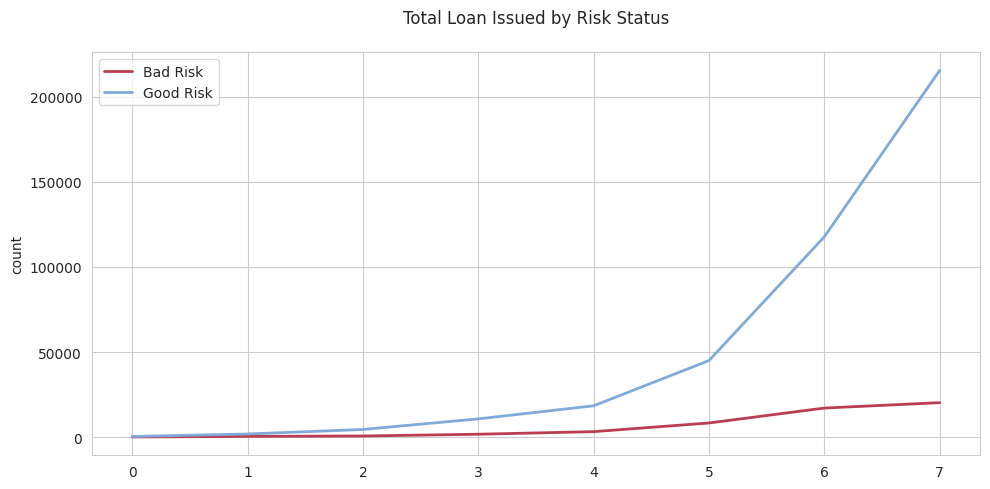

In [93]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
issue_agg2.plot(kind='line', ax=ax, lw=2,
                color=['#ba3d51', '#7faadb'])

ax.set_title('Total Loan Issued by Risk Status\n',
        fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

In [94]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

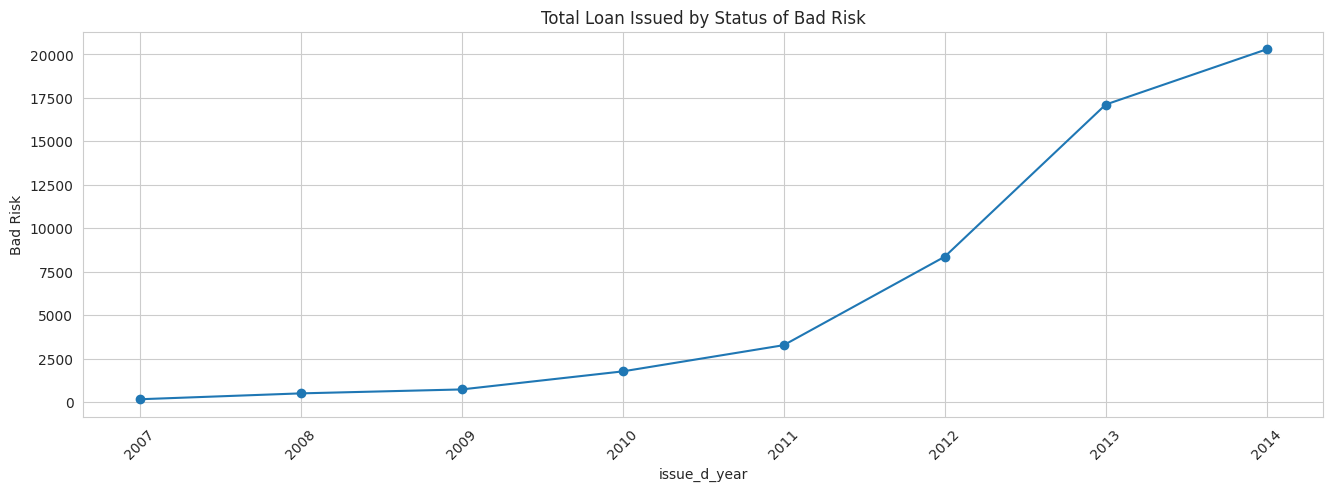

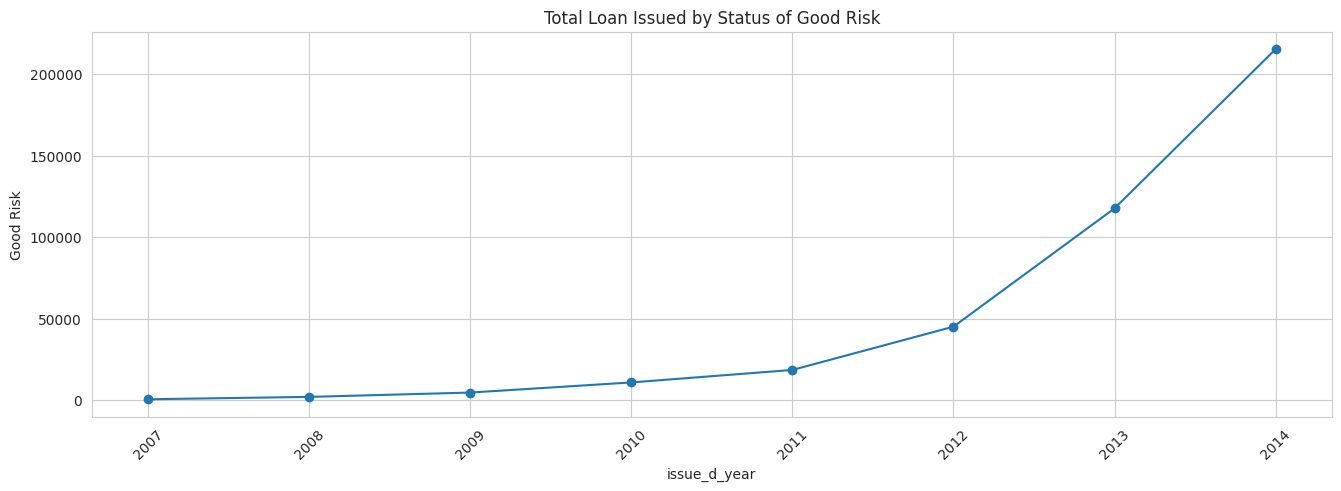

In [95]:
for i in issue_agg2.columns:
  if i != 'issue_d_year':
    plot_df(issue_agg2, x=issue_agg2['issue_d_year'], y=issue_agg2[i], title='Total Loan Issued by Status of ' + i, ylabel = i)

jumlah pinjaman yang mempunyai risiko buruk juga semakin meningkat dari tahun ke tahun dimana peningkatan tertinggi terjadi pada tahun 2012 hingka tahun 2013

###**Total Credit Line Opened Over Time**

In [96]:
df1["earliest_cr_line_year"] = df1["earliest_cr_line"].dt.strftime('%Y')
cline_agg = df1.groupby(["earliest_cr_line_year"])[["id"]].nunique()
cline_agg.rename(columns={"id": "count"}, inplace=True)
cline_agg.reset_index(inplace=True)
cline_agg

,earliest_cr_line_year,count
0,1944,1
1,1946,2
2,1948,1
3,1949,1
4,1950,4
...,...,...
60,2007,12282
61,2008,7177
62,2009,3665
63,2010,2734


In [97]:
def plot_df(df, x, y, title="", xlabel='earliest_cr_line_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

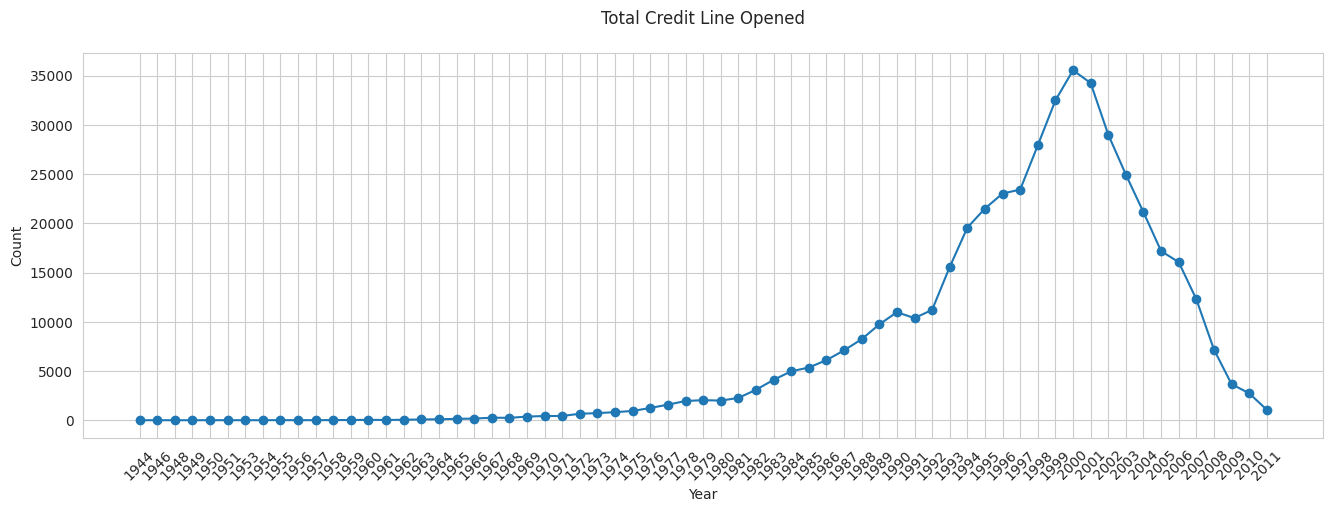

In [98]:
plot_df(cline_agg, x=cline_agg['earliest_cr_line_year'], y=cline_agg["count"], title="Total Credit Line Opened\n", xlabel='Year', ylabel = "Count")

###**Calculate the Total Loss Suffered by the Company**

In [99]:
# choose only bad risk loans
bad.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk


In [100]:
# calculate total loan to be paid
def word_strip(x):
  return x.strip()

bad['term'] = bad['term'].apply(lambda x: word_strip(x))
bad['term'] = bad['term'].replace(['60 months', '36 months'],[60,36])
bad['must_pay'] = bad['term'] * bad['installment']

In [101]:
# calculate the remaining loan to be paid
bad['remain_pay'] = bad['must_pay'] - (bad['total_pymnt'] + bad['total_rec_late_fee'] + bad['collection_recovery_fee'])

In [102]:
# total applicants and loss
print('The number of applicants is', bad['id'].count())
print('Total loss suffered by the company is', bad['remain_pay'].sum())

The number of applicants is 52186
Total loss suffered by the company is 687949073.4686067


In [103]:
bad1 = bad.copy()

In [104]:
# reduce the number of categories of home ownership
def func(row):
    if row['loan_status'] == 'Charged Off':
        val = 'Charged Off'
    elif (row['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'):
        val ='Charged Off'
    elif (row['loan_status'] == 'Late (16-30 days)'):
        val ='Late'
    elif (row['loan_status'] == 'Late (31-120 days)'):
        val ='Late'
    else:
        val ='Default'
    return val

bad1['loan_status'] = bad.apply(func, axis=1)

In [105]:
# total loss per loan status
loss_agg= bad1.groupby(['loan_status']).agg({"remain_pay" : 'sum', 'id' : 'count'}).reset_index()
loss_agg.columns = ['loan status','total loss', 'total applicant']
loss_agg['% total loss'] = round(loss_agg['total loss']*100/sum(loss_agg['total loss']),2)
loss_agg['avg loss'] = (loss_agg['total loss'])/(loss_agg['total applicant'])
loss_agg.sort_values(by='total loss', ascending=False)

,loan status,total loss,total applicant,% total loss,avg loss
0,Charged Off,5.743563e+08,43236,83.49,13284.215244
2,Late,1.022933e+08,8118,14.87,12600.800273
1,Default,1.129945e+07,832,1.64,13581.065603


####**Breakdown: Loan Status of Charged Off**

In [106]:
bad_co = bad.loc[bad['loan_status'].isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off'])]
bad_co.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
205927,1441517,16000,16000,16000.0,36,14.09,547.55,B,B5,5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk,19711.8,13530.2709


In [107]:
# total applicants and loss
print('The number of applicants is', bad_co['id'].count())
print('Total loss suffered by the company is', bad_co['remain_pay'].sum())

The number of applicants is 43236
Total loss suffered by the company is 574356330.2704517


####**Breakdown: Loan Status of Late**

In [108]:
bad_lt = bad.loc[bad['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)'])]
bad_lt.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
318380,25197203,9925,9925,9925.0,36,24.08,389.81,F,F2,1 year,...,NaN,NaN,NaN,30800.0,NaN,NaN,NaN,Bad Risk,14033.16,8965.63


In [109]:
# total applicants and loss
print('The number of applicants is', bad_lt['id'].count())
print('Total loss suffered by the company is', bad_lt['remain_pay'].sum())

The number of applicants is 8118
Total loss suffered by the company is 102293296.61607844


####**Breakdown: Loan Status of Default**

In [110]:
bad_df = bad[bad['loan_status'] == 'Default']
bad_df.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk,must_pay,remain_pay
231181,37830811,25000,25000,25000.0,60,15.99,607.82,D,D2,4 years,...,NaN,NaN,NaN,87800.0,NaN,NaN,NaN,Bad Risk,36469.2,31639.95


In [111]:
# total applicants and loss
print('The number of applicants is', bad_df['id'].count())
print('Total loss suffered by the company is', bad_df['remain_pay'].sum())

The number of applicants is 832
Total loss suffered by the company is 11299446.58207646


# **Stage 2 :Data Preprocessing**

##**Data Cleansing**
---

###**Drop Unnecessary Columns**

In [112]:
df.drop(['id'], inplace= True, axis=1)
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
412119,14375,14375,14375.0,36 months,13.65,488.87,C,C1,2 years,RENT,...,NaN,NaN,NaN,NaN,NaN,31100.0,NaN,NaN,NaN,Good Risk


###**Detecting Duplication**

In [113]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


###**Detecting Missing Values**

In [114]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
open_il_24m,float64,100.0
verification_status_joint,float64,100.0
dti_joint,float64,100.0
open_il_12m,float64,100.0
open_il_6m,float64,100.0
...,...,...
funded_amnt,int64,0.0
total_rec_int,float64,0.0
total_rec_late_fee,float64,0.0
recoveries,float64,0.0


In [115]:
# drop features that have large number of missing values (> 50%)
df.drop(df.iloc[:, 47:64], inplace=True, axis=1)
df.drop(['verification_status_joint','dti_joint',
         'annual_inc_joint', 'mths_since_last_record',
         'mths_since_last_major_derog', 'mths_since_last_delinq'], inplace=True, axis=1)

In [116]:
# check for missing values
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
next_pymnt_d,datetime64[ns],48.728567
emp_length,object,4.505399
last_pymnt_d,datetime64[ns],0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,datetime64[ns],0.009007
pub_rec,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219


<Axes: xlabel='acc_now_delinq', ylabel='Density'>

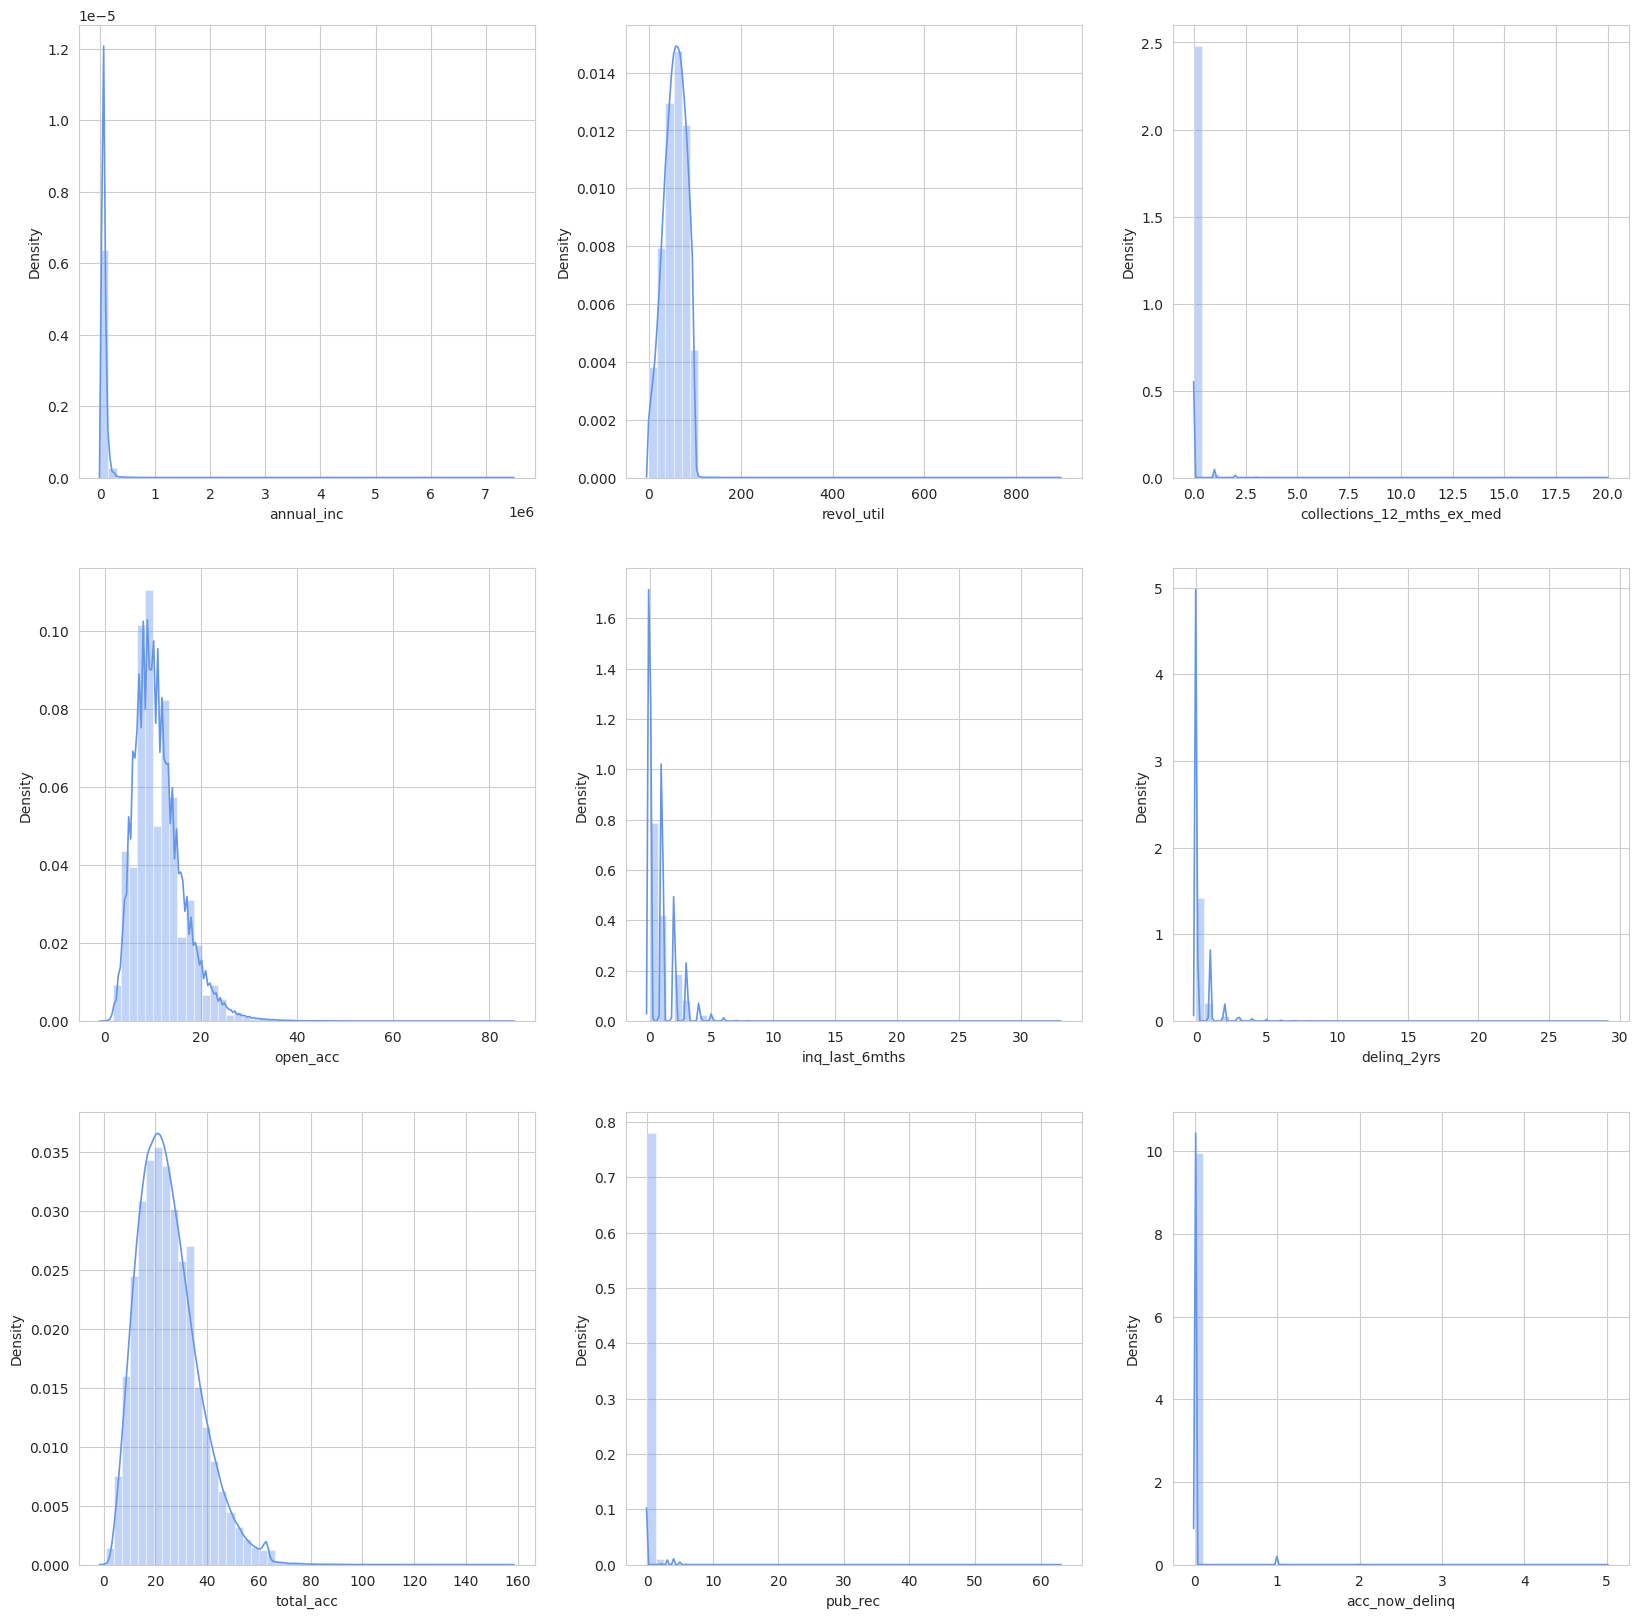

In [117]:
# distribution of numerical features that have missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['acc_now_delinq'], ax=ax[2][2])

In [118]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cat_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns.tolist()
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cat_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [119]:
# after imputation
print('Missing values status:', df.isnull().values.any())

Missing values status: False


##**Building a Model**
---

###**Drop Unnecessary Feature**

In [120]:
df.drop(['loan_status'], inplace=True, axis=1)

###**Create a New Feature from Date Type Features**

In [121]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

In [122]:
# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

In [123]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day
154350,16200,16200,16200.0,60 months,17.27,404.97,C,C5,10+ years,MORTGAGE,...,1,2015,12,1,2016,1,1,2016,1,1


###**Encoding**

In [124]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'risk']

###**One Hot Encoding**

In [125]:
df_1 = df.drop(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'], axis=1)
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

In [126]:
from sklearn.preprocessing import OneHotEncoder
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
df_encoded.columns = oho.get_feature_names_out(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
28107,3200,3200,3200.0,36 months,11.49,105.51,B,B4,8 years,61500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###**Manual Encoding**

In [127]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8,
                                           '9 years':9, '10+ years':10},inplace=True)

###**Label Encoding**

In [128]:
from sklearn.preprocessing import LabelEncoder

# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

In [129]:
concatenated_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_Fractional Loan,initial_list_status_Whole Loan
0,171,171,4975.0,0,10.65,162.87,1,6,10,24000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,71,71,2500.0,1,15.27,59.83,2,13,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,67,2400.0,0,15.96,84.33,2,14,10,12252.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,371,371,10000.0,0,13.49,339.31,2,10,10,49200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,91,91,3000.0,1,12.69,67.79,1,9,1,80000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


###**Feature Selection**

In [130]:
corr = concatenated_data.corrwith(concatenated_data["risk"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
30,risk,1.000000
22,total_rec_prncp,0.254255
37,last_pymnt_d_year,0.252786
21,total_pymnt_inv,0.194638
20,total_pymnt,0.193977
...,...,...
33,issue_d_day,NaN
36,earliest_cr_line_day,NaN
39,last_pymnt_d_day,NaN
42,next_pymnt_d_day,NaN


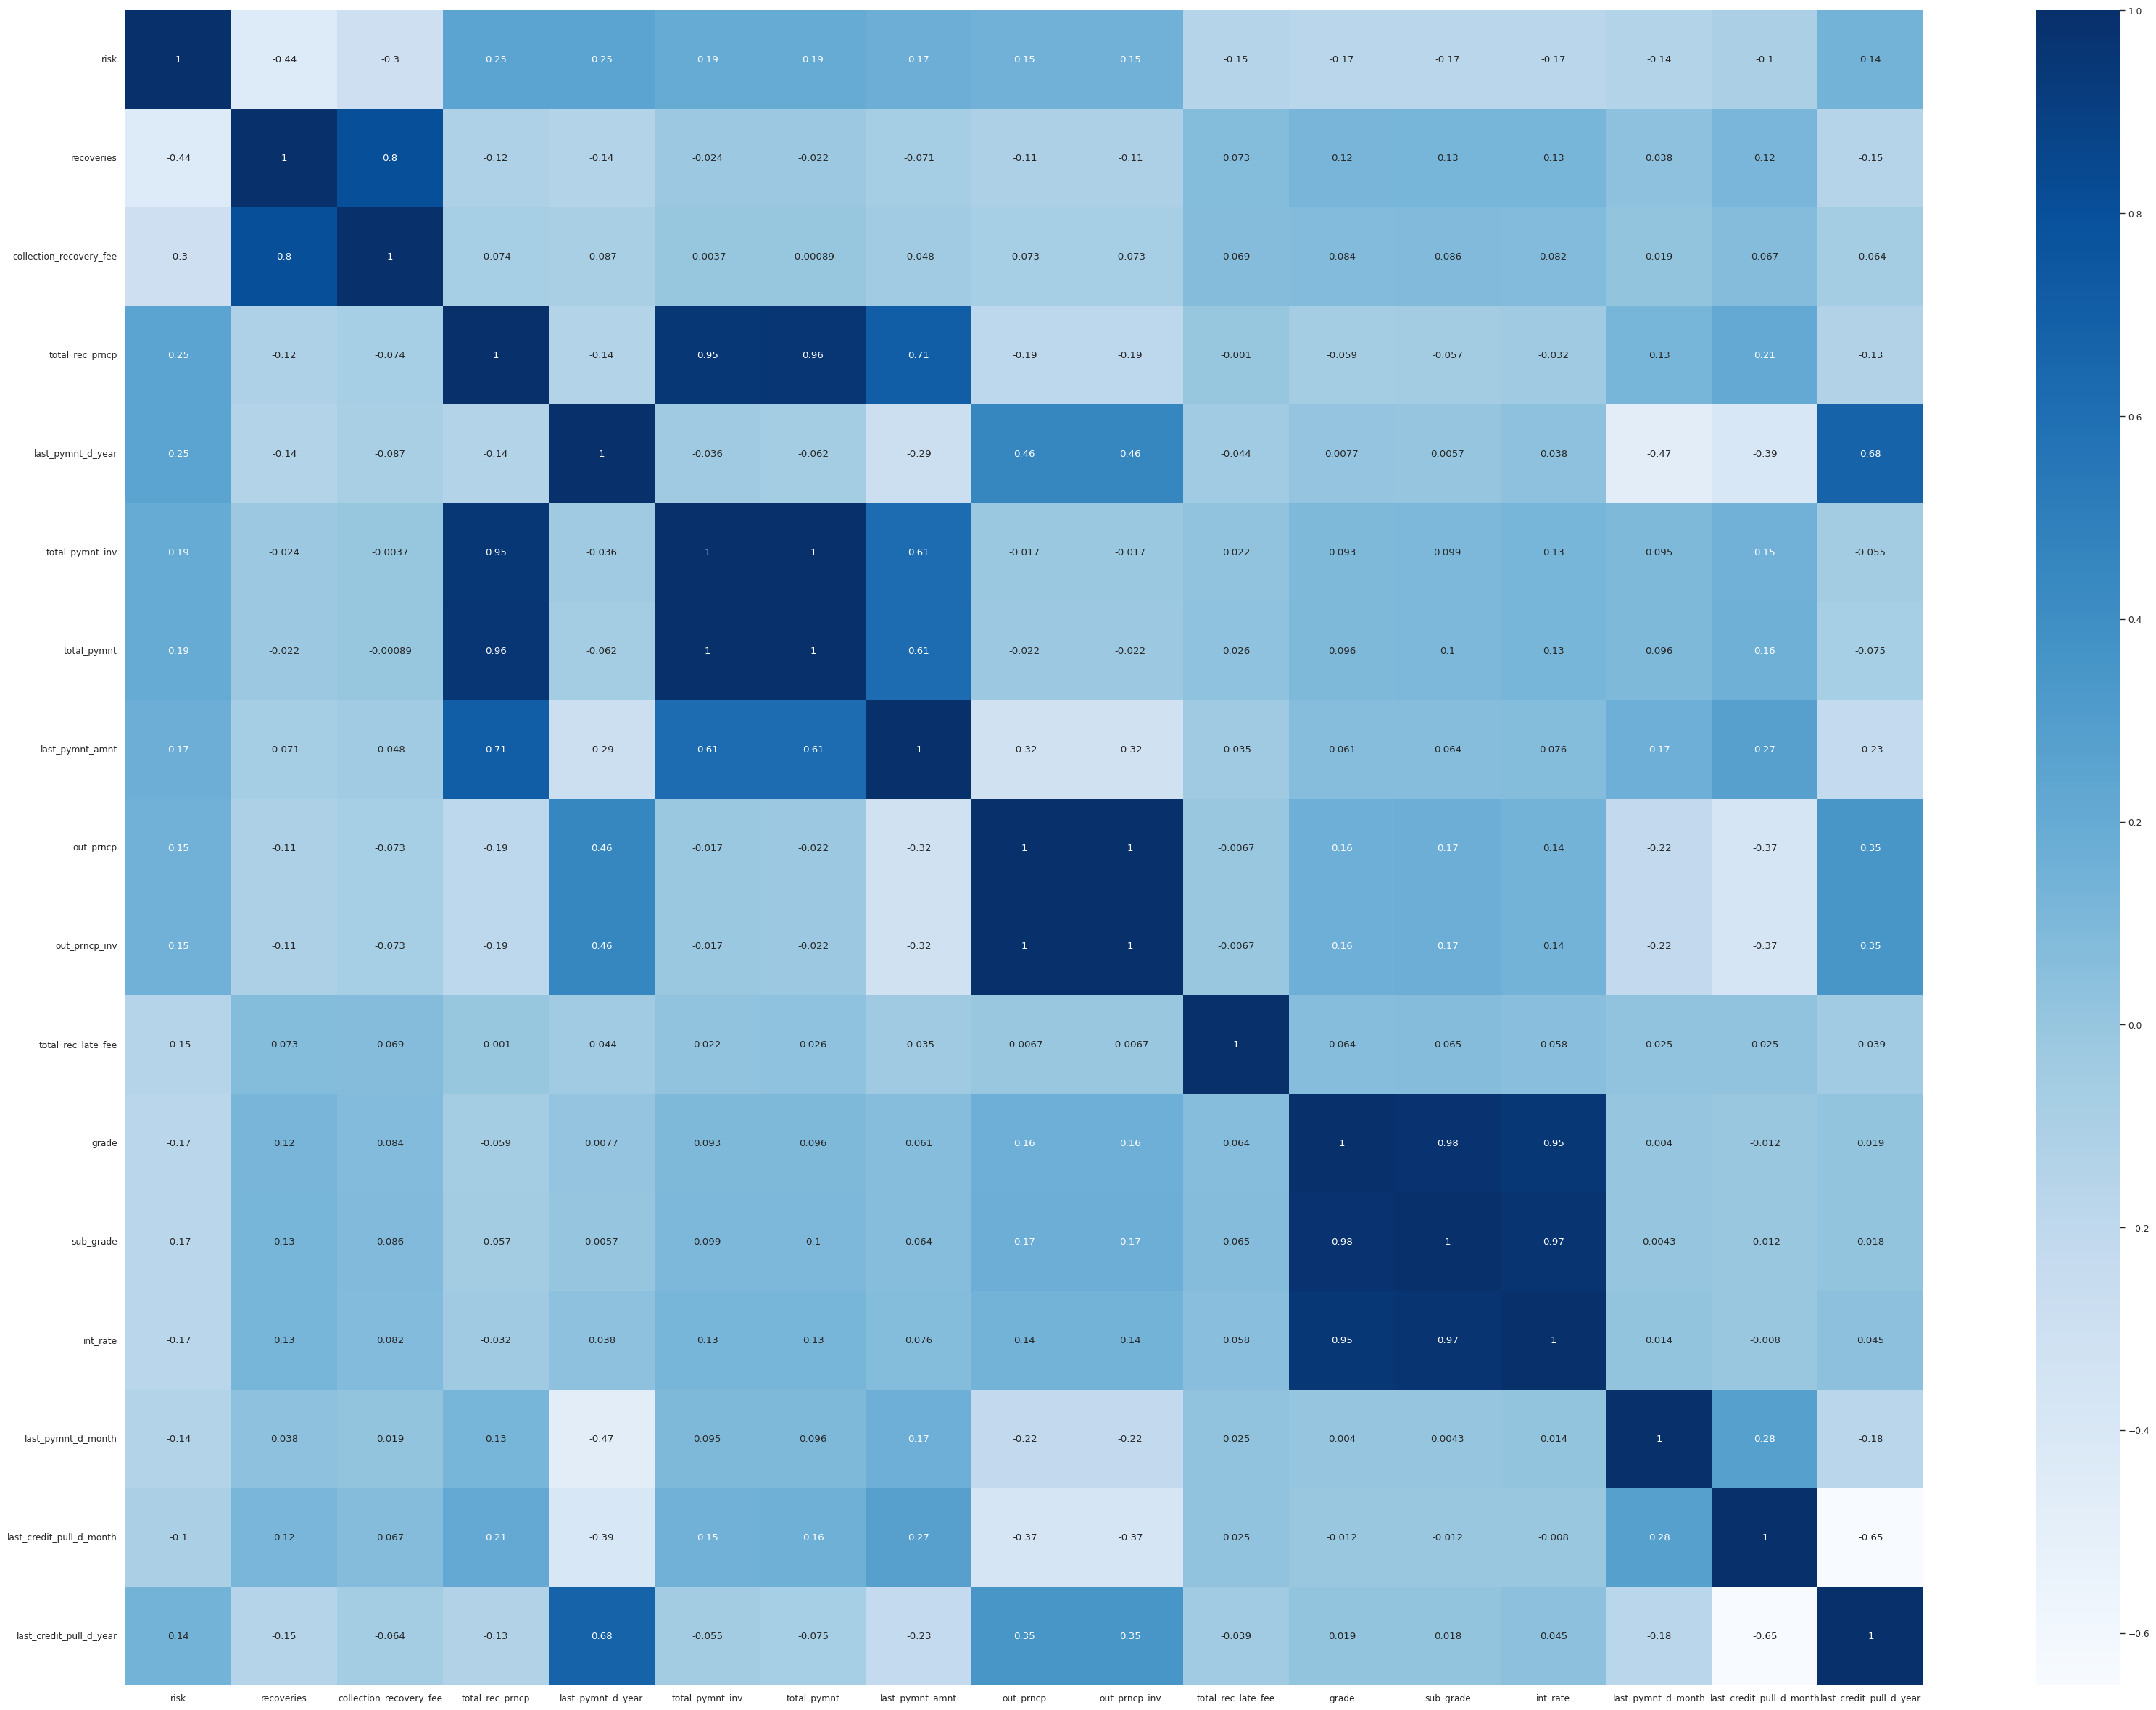

In [131]:
# let's only include the features mentioned above
fig = plt.figure(figsize = (40,30))
corr_data = concatenated_data[['risk', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp' , 'last_pymnt_d_year',
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                              'last_credit_pull_d_month', 'last_credit_pull_d_year']]
sns.heatmap(corr_data.corr(),cmap='Blues', annot = True);

###**Handling Imbalanced Data**

In [132]:
# define X and y
X = corr_data.drop(['risk'], axis=1) #features
y = corr_data['risk'] #target

In [133]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # good risk
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # bad risk

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

Before OverSampling, counts of label '1': 414099
Before OverSampling, counts of label '0': 52186 

After OverSampling, the shape of train_X: (828198, 16)
After OverSampling, the shape of train_y: (828198,) 

After OverSampling, counts of label '1': 414099
After OverSampling, counts of label '0': 414099


###**Data Splitting**

In [134]:

from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X_balanced_res, y_balanced_res, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(662558, 16) (165640, 16)


###**Normalization**

In [135]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data for numerical stability
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Stage 3 :Data Modelling**

In [136]:
!pip install xgboost

In [137]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #roc score

##**Decision Tree**
---

In [138]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


###**Performance of Training Model**

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



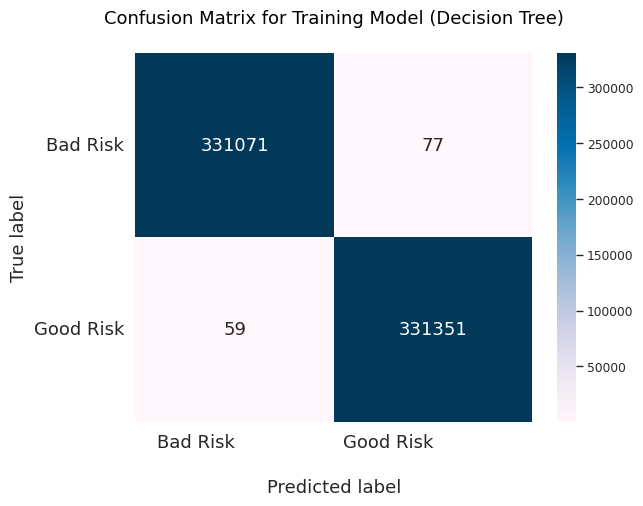

In [139]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     82951
           1       0.99      0.98      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



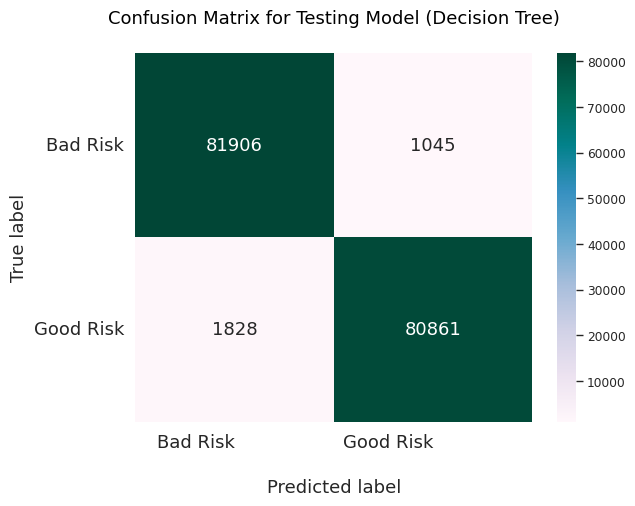

In [140]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [141]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.98 %
Testing Accuracy: 98.27 %


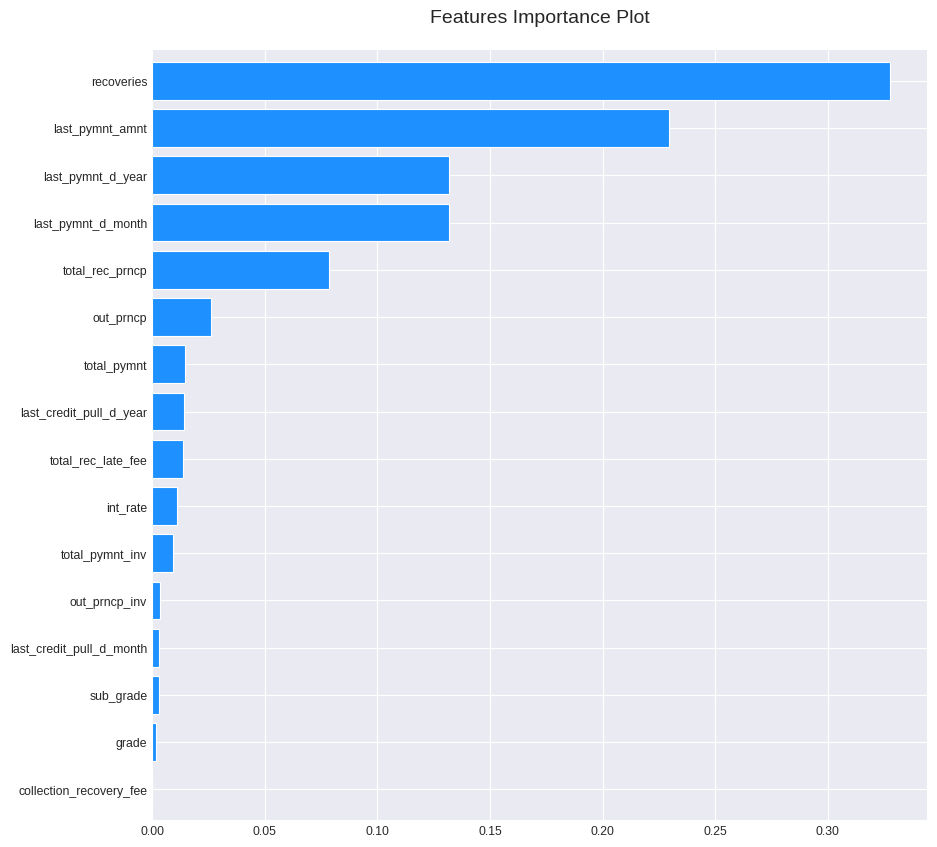

In [142]:
# important features
importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_dt.plot(kind ='barh', color='#1E90FF', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature dt.png')

##**Random Forest**
---

In [143]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


###**Performance of Training Model**

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



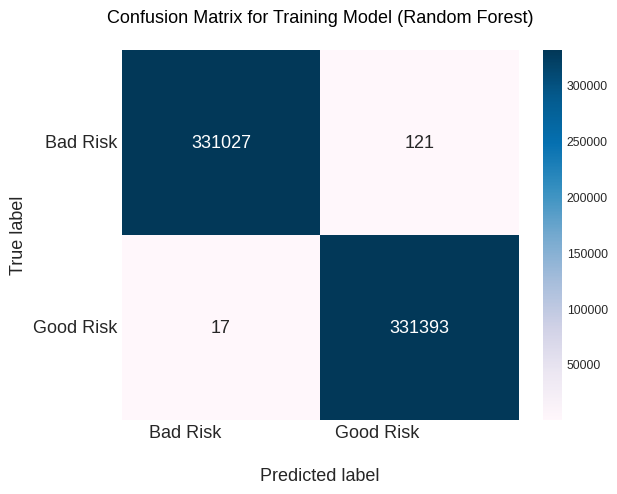

In [144]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



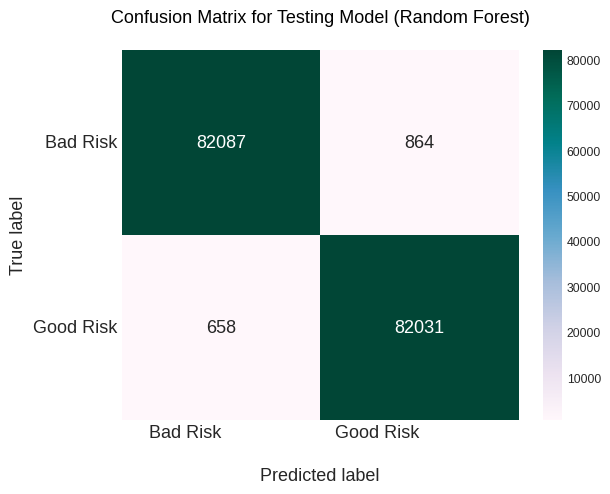

In [145]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [146]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.98 %
Test Accuracy: 99.08 %


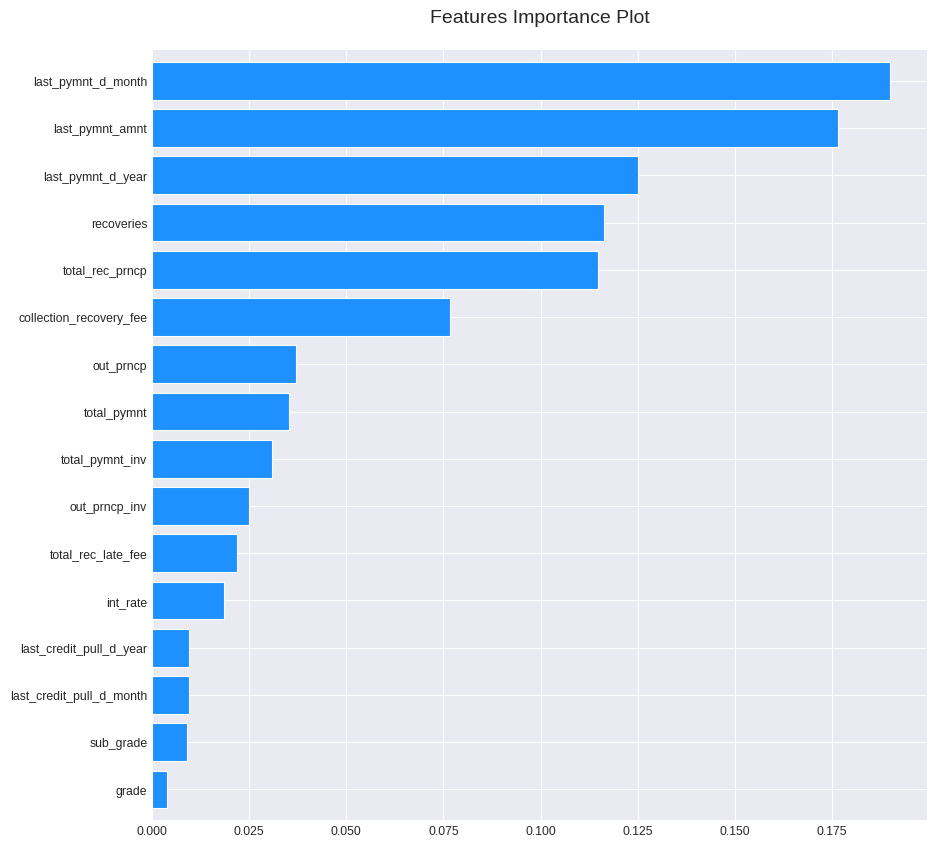

In [147]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color='#1E90FF', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

##**Logistic Regression**
---

In [148]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


###**Performance of Training Model**

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88    331148
           1       0.88      0.89      0.88    331410

    accuracy                           0.88    662558
   macro avg       0.88      0.88      0.88    662558
weighted avg       0.88      0.88      0.88    662558



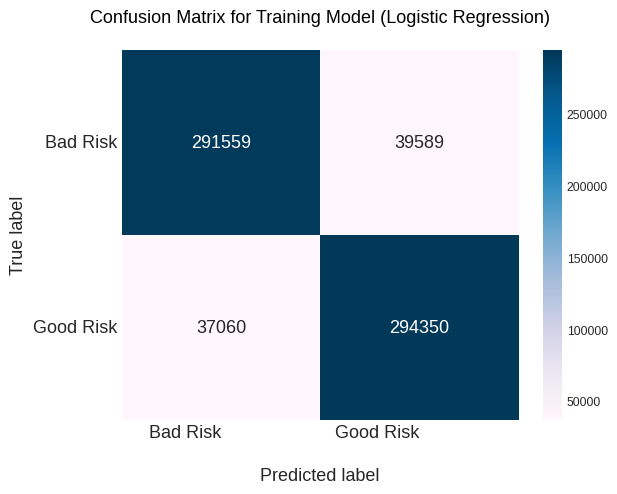

In [149]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     82951
           1       0.88      0.88      0.88     82689

    accuracy                           0.88    165640
   macro avg       0.88      0.88      0.88    165640
weighted avg       0.88      0.88      0.88    165640



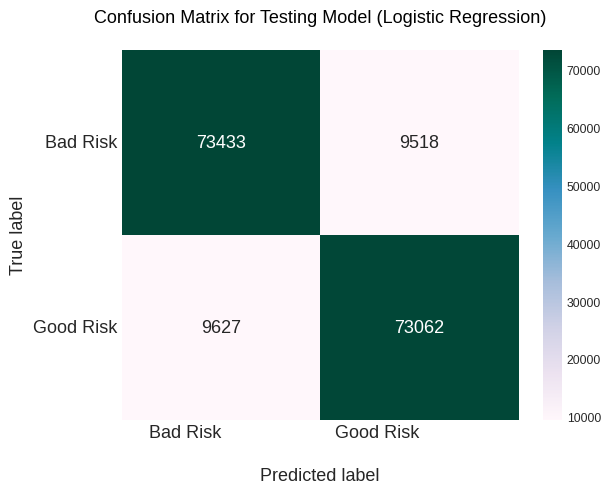

In [150]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [151]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 88.43 %
Test Accuracy: 88.44 %


##**Naive Bayes**
---

In [152]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


###**Performance of Training Model**

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.51      0.67    331148
           1       0.67      0.99      0.80    331410

    accuracy                           0.75    662558
   macro avg       0.83      0.75      0.74    662558
weighted avg       0.83      0.75      0.74    662558



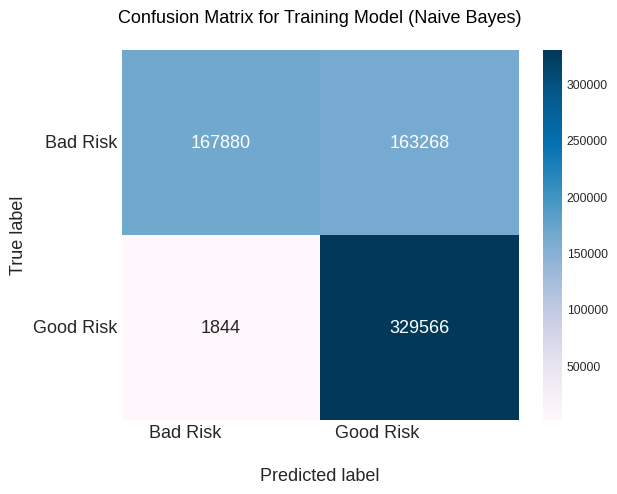

In [153]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     82951
           1       0.67      1.00      0.80     82689

    accuracy                           0.75    165640
   macro avg       0.83      0.75      0.73    165640
weighted avg       0.83      0.75      0.73    165640



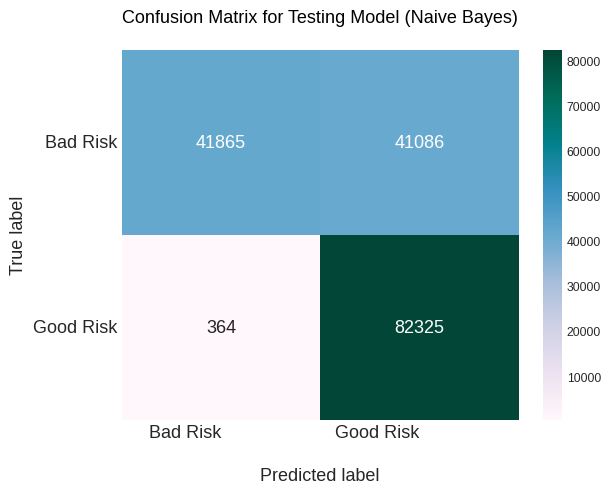

In [154]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [155]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 75.08 %
Test Accuracy: 74.98 %


##**MLP Classifier (Neural Network)**
---

In [156]:
# train the model
mlp_model = MLPClassifier().fit(X_train, y_train)

###**Performance of Training Model**

Classification Report Training Model (MLP Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    331148
           1       0.98      0.99      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



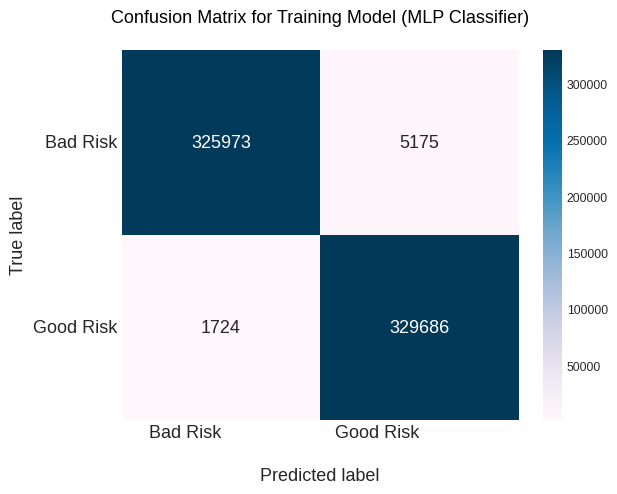

In [157]:
# predict data train
y_train_pred_mlp = mlp_model.predict(X_train)

# print classification report
print('Classification Report Training Model (MLP Classifier):')
print(classification_report(y_train, y_train_pred_mlp))

# form confusion matrix as a dataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_train, y_train_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (MLP Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



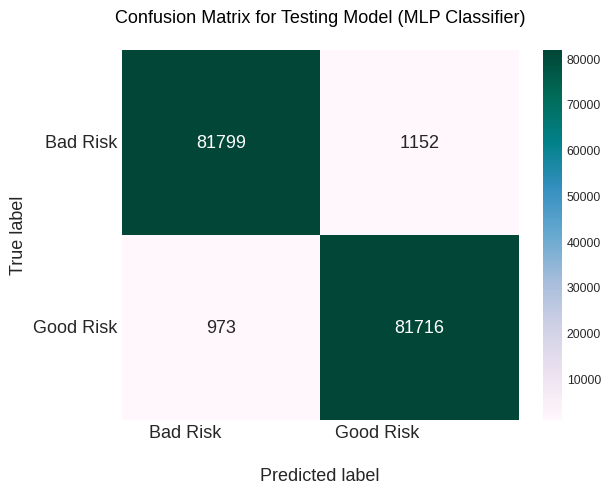

In [158]:
# predict data test
y_test_pred_mlp = mlp_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (MLP Classifier):')
print(classification_report(y_test, y_test_pred_mlp))

# form confusion matrix as a dataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_test, y_test_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [159]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 98.96 %
Test Accuracy: 98.72 %


##**XGBoost Classifier**
---

In [160]:
# train the model
xgb_model = XGBClassifier().fit(X_train, y_train)

###**Performance of Training Model**

Classification Report Training Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    331148
           1       0.99      1.00      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



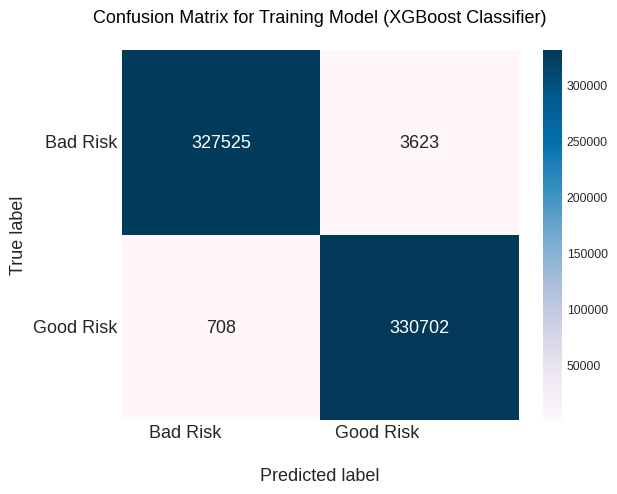

In [161]:
# predict data train
y_train_pred_xgb = xgb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (XGBoost Classifier):')
print(classification_report(y_train, y_train_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



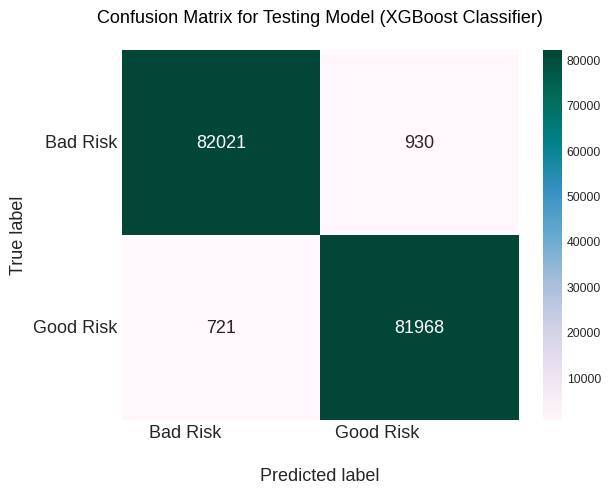

In [162]:
# predict data test
y_test_pred_xgb = xgb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_test_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [163]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.35 %
Test Accuracy: 99.0 %


##**Gradient Boosting Classifier**
---

In [169]:
# train the model
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

###**Performance of Training Model**

Classification Report Training Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



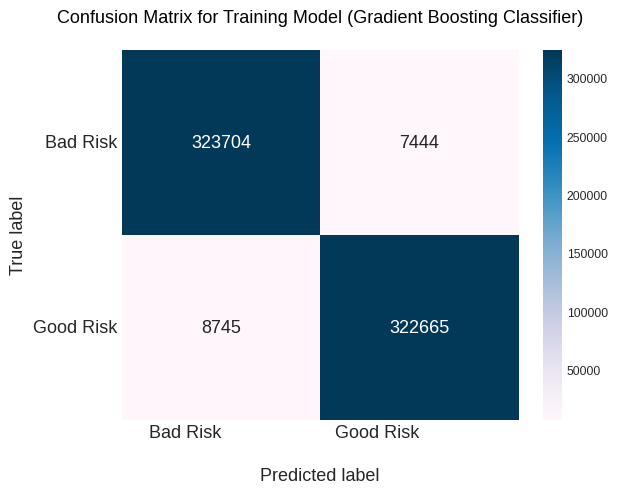

In [170]:
# predict data train
y_train_pred_gb = gb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     82951
           1       0.98      0.97      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



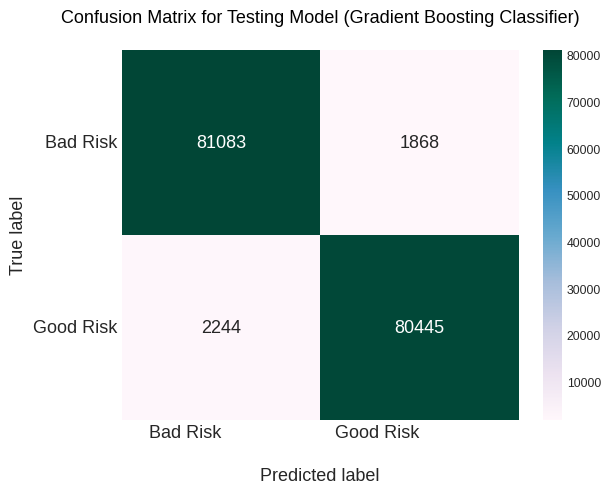

In [171]:
# predict data test
y_test_pred_gb = gb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [172]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 97.56 %
Test Accuracy: 97.52 %


##**K-Nearest Neighbors**
---

In [173]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


###**Performance of Training Model**

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



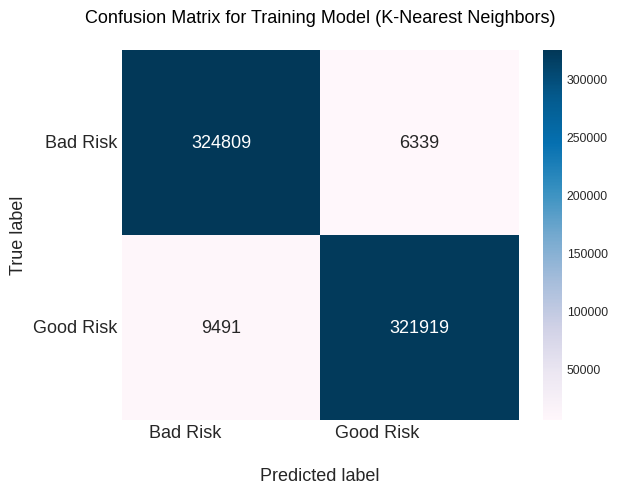

In [174]:
# predict data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

###**Performance of Testing Model**

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     82951
           1       0.97      0.96      0.97     82689

    accuracy                           0.97    165640
   macro avg       0.97      0.97      0.97    165640
weighted avg       0.97      0.97      0.97    165640



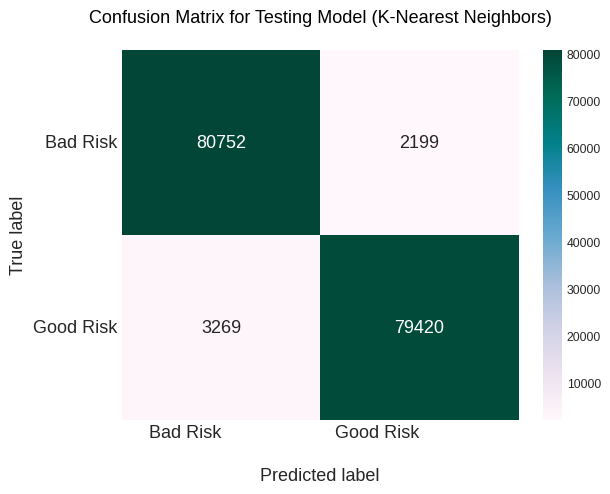

In [175]:
# predict data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

In [176]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 97.61 %
Test Accuracy: 96.7 %


##**Model Comparison**
---

In [177]:
results = pd.DataFrame([["Decision Tree", acc_dt_train, acc_dt_test],["Random Forest", acc_rf_train, acc_rf_test],
                        ["Logistic Regression", acc_log_train, acc_log_test], ["K-Nearest Neighbor", acc_knn_train, acc_knn_test],
                       ["Naive Bayes", acc_gnb_train, acc_gnb_test], ["MLP Classifier", acc_mlp_train, acc_mlp_test],
                        ["XGBoost  Classifier", acc_xgb_train, acc_xgb_test], ["Gradient Boosting Classifier", acc_gb_train, acc_gb_test]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score
1,Random Forest,99.980000,99.080000
0,Decision Tree,99.980000,98.270000
6,XGBoost Classifier,99.350000,99.000000
5,MLP Classifier,98.960000,98.720000
3,K-Nearest Neighbor,97.610000,96.700000
7,Gradient Boosting Classifier,97.560000,97.520000
2,Logistic Regression,88.430000,88.440000
4,Naive Bayes,75.080000,74.980000


#**kesimpulan**

berdasarkan analisa yang telah dilakukan

**Untuk algoritma machine learning**

Perusahaan dapat melihat ciri - ciri terpenting seperti bulan pembayaran terakhir, jumlah pembayaran terakhir, dan lain sebagainya untuk mengidentifikasi apakah pemohon memiliki kemungkinan menguntungkan atau merugikan

**Berdasarkan Insight**

Perusahaan dapat mengambil keputusan mutlak seperti menolak pinjaman, mengurangi jumlah pinjaman dan lain sebagainya untuk menghindari dan mengurangi total kerugian yang diderita oleh persahaan
